# UCI ML Hackathon Project: YelpNYC Fake Review Detection
## **Team GeeksforML**: Junchen Zhao(junchez3), Liya Yang (liyay4), Tanya Sreenagesh (tsreenag), Yuxin Shen (Yuxins10)

Team Google Drive Folder link : https://drive.google.com/drive/folders/1-UzLE5iAj0RFGb6ccokIDrXkZO5lIH-E?usp=sharing.
This folder contains the trained models, preprocessed dataset and our recorded videos.



In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


## Part1: Data Preprocessing (Don't implement this part. It's already done.)

In [ ]:
"""
In this part, I will read the data files from the share task, 
and I will save them into the our shared Google data folder.
"""

#Read metadata
metadata = pd.read_csv("/content/drive/MyDrive/YelpNYC/metadata.txt", delimiter = "\t", names = ["usr_id", "prod_id", "prod_rating", "review_label", "rating_date"])

In [ ]:
metadata

usr_id  prod_id  prod_rating  review_label rating_date
0          923        0          3.0            -1  2014-12-08
1          924        0          3.0            -1  2013-05-16
2          925        0          4.0            -1  2013-07-01
3          926        0          4.0            -1  2011-07-28
4          927        0          4.0            -1  2010-11-01
...        ...      ...          ...           ...         ...
359047  161146      349          5.0             1  2014-02-06
359048  116424      349          5.0             1  2014-01-31
359049  161147      349          5.0             1  2014-01-30
359050   97930      349          5.0             1  2014-01-25
359051    5260      349          5.0             1  2014-01-25

[359052 rows x 5 columns]

In [ ]:
#read review content
review_content = pd.read_csv("/content/drive/MyDrive/YelpNYC/reviewContent.txt", delimiter= "\t", names = ["usr_id", "prod_id", "rating_date", "text"])

In [ ]:
review_content

usr_id  ...                                               text
0          923  ...  The food at snack is a selection of popular Gr...
1          924  ...  This little place in Soho is wonderful. I had ...
2          925  ...  ordered lunch for 15 from Snack last Friday.  ...
3          926  ...  This is a beautiful quaint little restaurant o...
4          927  ...  Snack is great place for a  casual sit down lu...
...        ...  ...                                                ...
358952  161146  ...  I'm very spoiled with Pizza. Really, I have tr...
358953  116424  ...  Can't say enough good things about this place....
358954  161147  ...  Had a great dinner here- fantastic pizza, the ...
358955   97930  ...  Great foods and great drinks, they have even p...
358956    5260  ...  Pizza Loves Emily and I love Emily's pizza. Th...

[358957 rows x 4 columns]

In [ ]:
#read review_graph
review_graph = pd.read_csv("/content/drive/MyDrive/YelpNYC/reviewGraph.txt", delimiter= "\t", names = ["usr_id", "review_label", "prod_rating"])

In [ ]:
review_graph

usr_id  review_label  prod_rating
0          923             0          3.0
1          924             0          3.0
2          925             0          4.0
3          926             0          4.0
4          927             0          4.0
...        ...           ...          ...
359047  161146           349          5.0
359048  116424           349          5.0
359049  161147           349          5.0
359050   97930           349          5.0
359051    5260           349          5.0

[359052 rows x 3 columns]

In [ ]:
#read usr_id_map
usr_id_map = pd.read_csv("/content/drive/MyDrive/YelpNYC/userIdMapping.txt", delimiter="\t", names = ["usr_name", "usr_id"])

In [ ]:
usr_id_map

usr_name  usr_id
0       uop97wmeahYhnWSsHhGmHA  100752
1       i1s4QHRS5zZtZqPrTmutSA   31510
2       sd00TiP5ENkm6rKYPn3p3A   53651
3       ERxDm_rNNmgl40hfC78_7g   48047
4       FBjIChlJ437HqVe134bCVw   13449
...                        ...     ...
160220  RcMeGE0ink7hczwwpmvxDA  147638
160221  9bNIVxC4CxbLgDk2k_tP4g   31726
160222  wpBhT1F15xTbnOcYK6Tb7w   73829
160223  nyKwYsXyg2OTmfH408LzRQ  141950
160224  DoTmf2RVccPWEoTSI342zw  113984

[160225 rows x 2 columns]

In [ ]:
#read prod_id_map
prod_id_map = pd.read_csv("/content/drive/MyDrive/YelpNYC/productIdMapping.txt", delimiter="\t", names = ["prod_name", "prod_id"])

In [ ]:
prod_id_map

prod_name  prod_id
0                Snack        0
1            Peppino’s        1
2    Dekalb Restaurant        3
3          Le Parisien        4
4    Blue Spoon Coffee        5
..                 ...      ...
918            Beyoglu      917
919            Benares      902
920        BrisketTown      920
921            Bijan’s      921
922              Emily      349

[923 rows x 2 columns]

In [ ]:
# Data join to a large dataframe which contains everything
final_data = metadata.merge(usr_id_map, 
                            how = "inner",
                            on = "usr_id")
final_data = final_data.merge(prod_id_map,
                              how = "inner",
                              on = "prod_id")
final_data = final_data.merge(review_content,
                              how = "inner",
                              on = ["usr_id", "prod_id", "rating_date"])

In [ ]:
final_data

usr_id  ...                                               text
0          923  ...  The food at snack is a selection of popular Gr...
1          924  ...  This little place in Soho is wonderful. I had ...
2          925  ...  ordered lunch for 15 from Snack last Friday.  ...
3          926  ...  This is a beautiful quaint little restaurant o...
4          927  ...  Snack is great place for a  casual sit down lu...
...        ...  ...                                                ...
358952   43880  ...  I may not be a gumbo expert, but I know what g...
358953   43881  ...  Stopped by The Gumbo Bros stand for lunch this...
358954   43882  ...  The Gumbo Bros couldn't have hit NYC at a bett...
358955   43883  ...  This is the best gumbo I have ever had! I am f...
358956   43884  ...  I'm from Louisiana, so I've eaten hundreds of ...

[358957 rows x 8 columns]

## Part2: Dataset Analysis

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")
combined_data_with_analysis = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data_with_analysis.csv")

In [ ]:
combined_data.head(100)

usr_id  ...                                               text
0      923  ...  The food at snack is a selection of popular Gr...
1      924  ...  This little place in Soho is wonderful. I had ...
2      925  ...  ordered lunch for 15 from Snack last Friday.  ...
3      926  ...  This is a beautiful quaint little restaurant o...
4      927  ...  Snack is great place for a  casual sit down lu...
..     ...  ...                                                ...
95    1018  ...  Snack is a simple, tiny little restaurant tuck...
96    1019  ...  snacks, to me, are tasty little tidbits of hap...
97    1020  ...  Hmmm soso.... I can't much about it other than...
98    1021  ...  Snack is simple, but good - like its name! The...
99    1022  ...  This place is really charming.  It is a great ...

[100 rows x 8 columns]

In [ ]:
# Get holistic view on the dataset information
combined_data.describe()

usr_id        prod_id    prod_rating   review_label
count  358957.000000  358957.000000  358957.000000  358957.000000
mean    53997.215187     459.989378       4.025861       0.794627
std     45808.754776     259.913081       1.055113       0.607099
min       923.000000       0.000000       1.000000      -1.000000
25%     13840.000000     247.000000       4.000000       1.000000
50%     40532.000000     468.000000       4.000000       1.000000
75%     87321.000000     672.000000       5.000000       1.000000
max    161147.000000     922.000000       5.000000       1.000000

In [ ]:
# Split dataframe based on the review_label
fake_review_df = combined_data.loc[combined_data["review_label"] == -1]
real_review_df = combined_data.loc[combined_data["review_label"] == 1]

In [ ]:
# Get hostlistic view on the fake review df
fake_review_df.describe()

usr_id       prod_id   prod_rating  review_label
count   36860.000000  36860.000000  36860.000000       36860.0
mean    79225.756538    464.319832      3.955426          -1.0
std     46757.284047    256.649663      1.294395           0.0
min       923.000000      0.000000      1.000000          -1.0
25%     39070.750000    247.000000      4.000000          -1.0
50%     80045.500000    468.000000      4.000000          -1.0
75%    119273.250000    668.000000      5.000000          -1.0
max    161112.000000    922.000000      5.000000          -1.0

In [ ]:
real_review_df.describe()

usr_id        prod_id    prod_rating  review_label
count  322097.000000  322097.000000  322097.000000      322097.0
mean    51110.122063     459.493811       4.033921           1.0
std     44802.101084     260.279730       1.023865           0.0
min       937.000000       0.000000       1.000000           1.0
25%     12761.000000     247.000000       4.000000           1.0
50%     36196.000000     467.000000       4.000000           1.0
75%     81729.000000     672.000000       5.000000           1.0
max    161147.000000     922.000000       5.000000           1.0

### Fakers Analysis

In [ ]:
# check whether there is usr who gives both fake and real reviews to products
fakers = np.intersect1d(np.array(real_review_df["usr_id"]), np.array(fake_review_df["usr_id"]))

In [ ]:
real_review_df["text"][16]

'This spot is close to my job so I decided to check it out for lunch. The prices are just about what you would expect for Soho/"South Village" sit-down lunch prices; my meal came out to $20 for a mint lemonade and a decent-sized salad. I ordered what I think may have been a special, a roasted chicken & vegetable salad. The chicken was unbelievably dry, to the point where I had tough time chewing without choking a bit. It was served on a bed of arugula which could have chopped a little finer as it was in full, hard to eat pieces. When I eat a salad, I expect it to be cut down to make for easier bites. Not necessarily a chopped salad, just pieces that will actually fit in your mouth without chopping it up yourself. Basically, I don\'t want to use a knife to eat a salad. However, service was friendly & quick and the restaurant itself was comfortable, albeit tiny. I would go back to try something else, but probably not for a salad.'

In [ ]:
fake_review_df["text"][5]

"A solid 4 stars for this greek food spot. \xa0If you're a fan of lamb like I am, you must come here and try the lamb sandwich. \xa0Amazingly tender and juicy with onions and arugula. \xa0Also had a good greek salad."

In [ ]:
# look at how many fakers we have
len(fakers)

657

In [ ]:
#Get holistic view on the faker df
faker_mask = combined_data["usr_id"].isin([i for i in fakers])
faker_df = combined_data[faker_mask]
faker_df

usr_id  ...                                               text
39         962  ...  I ordered the spinach pies. Not very good. Sog...
53         976  ...  YUMS! I just tried the Carp Roe and it's soooo...
315       6583  ...  have been here twice now... the food is solid ...
480       6748  ...  It's cute, the staff is incredibly friendly an...
563       2126  ...  This is wonderful Greek food. It was the perfe...
...        ...  ...                                                ...
358206   75269  ...   Love the food here! So inexpensive and delicious
358561   42473  ...  Attempted to come here a few weeks ago, but I ...
358847   16515  ...  I generally don't like my sports bars with a W...
358848   25716  ...  As a huge fan of these guys first spot Manhatt...
358866  115227  ...  Coolest place in the area by far! The truffle ...

[3954 rows x 8 columns]

In [ ]:
faker_df.describe()

usr_id      prod_id  prod_rating  review_label
count    3954.000000  3954.000000  3954.000000   3954.000000
mean    30060.048811   455.937785     3.941578      0.483055
std     31722.371356   259.571433     1.100043      0.875701
min       962.000000     0.000000     1.000000     -1.000000
25%      5988.000000   247.000000     3.000000     -1.000000
50%     18370.000000   468.000000     4.000000      1.000000
75%     43054.500000   668.000000     5.000000      1.000000
max    156708.000000   922.000000     5.000000      1.000000

In [ ]:
combined_data.loc[combined_data["usr_id"] == 923]

usr_id  ...                                               text
0         923  ...  The food at snack is a selection of popular Gr...
210       923  ...  The restaurant is on the ground floor of a typ...
533       923  ...  Really nice mousaka and lovely décor inside. A...
1380      923  ...  I really enjoyed brunch at Jane. The ambiance ...
3338      923  ...  We ate at the Blue Ribbon with colleagues. The...
4063      923  ...  I loved the antibiotic- and hormone-free chick...
4300      923  ...  Clinton street baking is a super popular baker...
6977      923  ...  Thiru has wonderful personality. He has a very...
7255      923  ...  The Tom's Restaurant is the outside shot of th...
8076      923  ...  Great food and wine! Waitress was super helpfu...
8456      923  ...  This restaurant was quite a pleasant surprise....
9055      923  ...  Tough place to find unless you know the exact ...
9716      923  ...  This is the place to go if u love tofu, kimchi...
10316     923  ...  I recently ate at Olea again and continue to b...
10829     923  ...  I always visit if in the mood for a hearty Pol...
11253     923  ...  This place has amazing tacos. The sopes are pr...
11806     923  ...  Late night spot I always go to end a good nigh...
13964     923  ...  Basso56 was very crowded with the theatre crow...
14406     923  ...  Its as rare as seeing a white tiger- a hip res...
15299     923  ...  This place is amazing. from the appetizer to t...
15564     923  ...  The food is simply excellent. Everything is as...
16529     923  ...  A great place to go for vegan comfort food and...
17023     923  ...  The crab and pork noodles is delicious!!! I re...
18247     923  ...  I was in the neighborhood with out-of-town gue...
18674     923  ...  We had a lovely meal on a Friday night at Marc...
19288     923  ...  Tried the huge slices with some of my friends ...
19451     923  ...  This place is amazing.We really love good lati...
19690     923  ...  I had Nasi Lemak and Nyonya Seafood Fried Rice...
20891     923  ...  My husband and I went to this restaurant for a...
21119     923  ...  The Post Office is a friendly place. The staff...
21320     923  ...  Their pickled vegetable soul is excellent. We ...
21747     923  ...  The falafel were superb, stuffed grape leaved ...
23283     923  ...  This is a super little spot for brunch. Quaint...
24842     923  ...  The place is hard to find and out of the way, ...
25303     923  ...  I've been to Market Table several times and I ...
25914     923  ...  Salads are good. Prices are good. Pesto lasagn...
26485     923  ...  Bistango is a casual trattoria that hits all t...
26971     923  ...  Their ramen is very mediocre, we are living in...
34349     923  ...  Great dinner with great service. Party of elev...

[39 rows x 8 columns]

### Wordcloud Analysis

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

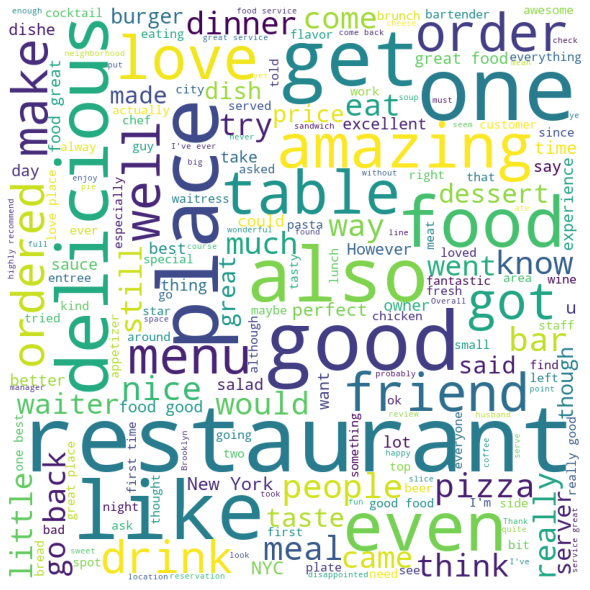

In [ ]:
#Word Cloud for fake review

wordcloud_fake = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(fake_review_df["text"])) 
  
# plot the word cloud for fake reviews data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_fake) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

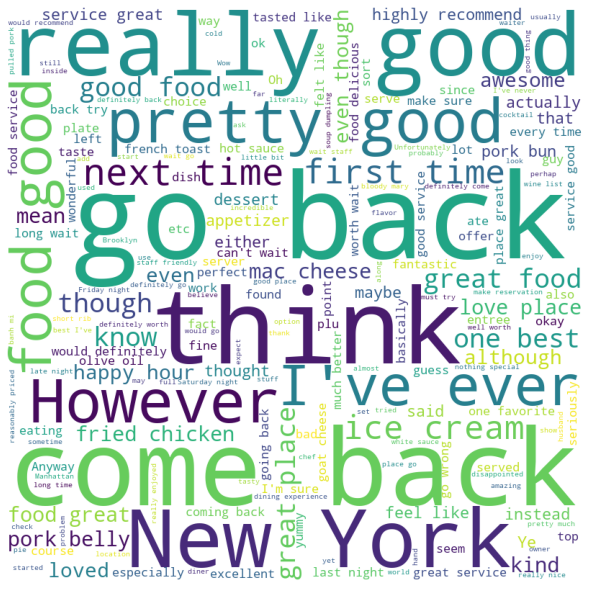

In [ ]:
# Word Cloud for real review

wordcloud_real = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(real_review_df["text"])) 
  
# plot the word cloud for real reviews data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_real) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Text Length Analysis

In [ ]:
combined_data_with_analysis.head()

usr_id  prod_id  ...  length  sentiment
0     923        0  ...     215        5.0
1     924        0  ...     269        3.0
2     925        0  ...     178        3.0
3     926        0  ...     491       17.0
4     927        0  ...     596       17.0

[5 rows x 10 columns]

Text(0.5, 1.0, 'Article Length by Label')

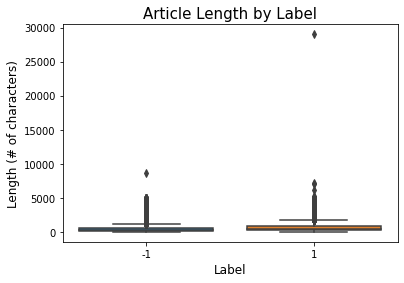

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='review_label', y='length', data=combined_data_with_analysis)

plt.xlabel("Label", fontsize= 12)
plt.ylabel("Length (# of characters)", fontsize= 12)
plt.title("Article Length by Label", fontsize=15)

### Sentiment Score Analysis

In [ ]:
!pip install afinn
from afinn import Afinn

afinn = Afinn(language='en')

# Example of sentiment scores
print('Score for "I hate this and it sucks": ', afinn.score("I hate this and it sucks"))
print('Score for "I love it and it\'s great!": ', afinn.score("I love it and it's great!"))

     |████████████████████████████████| 61kB 5.8MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp37-none-any.whl size=53451 sha256=c120de9c0efac16f31ca1c3977114dd1cf51f2cd3ec9d4688e38e1683e8b65b8
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn
Score for "I hate this and it sucks":  -6.0
Score for "I love it and it's great!":  6.0


Text(0.5, 1.0, 'Sentiment by group')

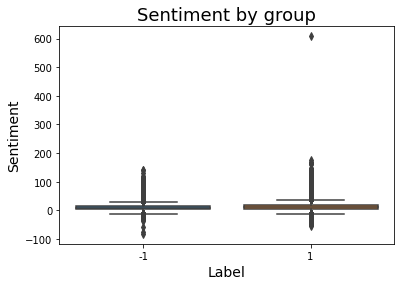

In [ ]:
sns.boxplot(x='review_label', y='sentiment', data=combined_data_with_analysis)

plt.xlabel("Label", fontsize= 14)
plt.ylabel("Sentiment", fontsize= 14)
plt.title("Sentiment by group", fontsize=18)

### Sentiment Score Analysis (Oversampled Data)

In [ ]:
MAX_LEN = 128

#splitting data for training and testing
import sklearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# setting up testing and training sets
x_train,x_test,y_train,y_test = train_test_split(combined_data['text'],combined_data['review_label'],test_size=0.2, random_state = 1)

# concatenate our training data back together
tp_data = pd.concat([x_train, y_train], axis=1)

# separate minority and majority classes
real = tp_data[tp_data.review_label==1]
fake = tp_data[tp_data.review_label==-1]

# upsample minority
fake_upsampled = resample(fake,
                          replace=True, # sample with replacement
                          n_samples=len(real), # match number in majority class
                          random_state=1) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([real, fake_upsampled])

# check new class counts
upsampled.review_label.value_counts()

-1    257825
 1    257825
Name: review_label, dtype: int64

In [ ]:
# Create sentiment column
upsampled['sentiment'] = upsampled.text.apply(lambda x: afinn.score(x))

Text(0.5, 1.0, 'Sentiment by group')

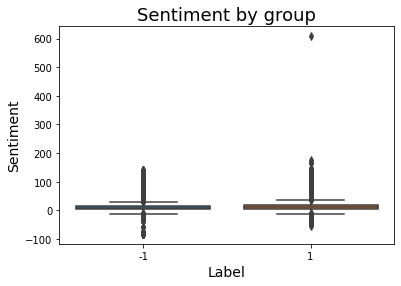

In [ ]:
sns.boxplot(x='review_label', y='sentiment', data=upsampled)

plt.xlabel("Label", fontsize= 14)
plt.ylabel("Sentiment", fontsize= 14)
plt.title("Sentiment by group", fontsize=18)

### Sentiment Score Analysis (Downsampled Data)

In [ ]:
MAX_LEN = 128

#splitting data for training and testing
import sklearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# setting up testing and training sets
x_train,x_test,y_train,y_test = train_test_split(combined_data['text'],combined_data['review_label'],test_size=0.2, random_state = 1)

# concatenate our training data back together
tp_data = pd.concat([x_train, y_train], axis=1)

# separate minority and majority classes
real = tp_data[tp_data.review_label==1]
fake = tp_data[tp_data.review_label==-1]

# upsample minority
real_downsampled = resample(real,
                          replace=True, # sample with replacement
                          n_samples=len(fake), # match number in majority class
                          random_state=1) # reproducible results

# combine majority and upsampled minority
downsampled = pd.concat([fake, real_downsampled])

# check new class counts
downsampled.review_label.value_counts()

-1    29340
 1    29340
Name: review_label, dtype: int64

In [ ]:
# Create sentiment column
downsampled['sentiment'] = downsampled.text.apply(lambda x: afinn.score(x))

Text(0.5, 1.0, 'Sentiment by group')

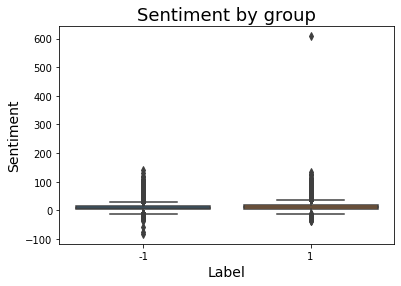

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='review_label', y='sentiment', data=downsampled)

plt.xlabel("Label", fontsize= 14)
plt.ylabel("Sentiment", fontsize= 14)
plt.title("Sentiment by group", fontsize=18)

## Part3: Model Training (Supervised Approach)

In [ ]:
# define dataset transfer
from sklearn.utils import resample
import pandas as pd
import numpy as np
def dataset_transfer(mode, X_train, X_test, y_train, y_test):
  X = pd.concat([X_train, y_train], axis=1)
  # separate minority and majority classes
  real = X[X['review_label'] == 1]
  fake = X[X['review_label'] == 0]
  
  if mode == "up": 
    # upsample minority
    fake_upsampled = resample(fake,
                              replace=True, # sample with replacement
                              n_samples=len(real), # match number in majority class
                              random_state=1) # reproducible results

    # combine majority and upsampled minority
    upsampled = pd.concat([real, fake_upsampled])
    y_train = upsampled.review_label
    X_train = upsampled.drop('review_label', axis=1)

    return X_train, X_test, y_train, y_test
  
  if mode == "down":
    # downsample majority
    real_downsampled = resample(real,
                              replace=True, # sample with replacement
                              n_samples=len(fake), # match number in minority class
                              random_state=1) # reproducible results

    # combine downsample majority and minority
    downsampled = pd.concat([real_downsampled, fake])
    y_train = downsampled.review_label
    X_train = downsampled.drop('review_label', axis=1)

    return X_train, X_test, y_train, y_test

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
# text and numeric classes that use sklearn base libaries
class TextTransformer(BaseEstimator, TransformerMixin):
    """
    Transform text features
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None, *parg, **kwarg):
        return self

    def transform(self, X):
        return X[self.key]

class NumberTransformer(BaseEstimator, TransformerMixin):
    """
    Transform numeric features
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
# Convert a collection of raw documents to a matrix of TF-IDF features using unigrams and bigrams on words
# with l2 norm: Sum of squares of vector elements is 1
vec_tdidf = TfidfVectorizer(ngram_range=(1,2), analyzer='word', norm='l2')

# compile both the TextTransformer and TfidfVectorizer to the text features
text = Pipeline([('transformer', TextTransformer(key='text')),
                ('vectorizer', vec_tdidf)])

# compile the NumberTransformer to the numeric features
fake_prob = Pipeline([('transformer', NumberTransformer(key='fake_prob'))])

# combine all of the features, text and numeric together
features = FeatureUnion([('text', text),
                         ('fake_prob', fake_prob)])

In [ ]:
# Add a new feature, fake probability (fake_prob) to the trainning and testing data 
# using Categorical Naive Bayes model.
def add_fake_prob(X_train, X_test, y_train, y_test):
  # Encoding Categories
  # OrdinalEncoder - convert the features to ordinal integers. 
  # This results in a single column of integers (0 to n_categories - 1) per feature.
  from sklearn.preprocessing import OrdinalEncoder
  X = pd.concat([X_train, X_test])
  X.drop('text', axis=1, inplace=True)
  encoder = OrdinalEncoder()
  data_encoded = encoder.fit_transform(X)
  X_encoded = pd.DataFrame(data_encoded, columns=X.columns)
  # LebelEncoder - Encode target labels with value between 0 and n_classes-1
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  y_train_encoded = le.fit_transform(y_train)
  # Split the encoded dataset into training and testing data
  X_train_encoded = X_encoded[:len(X_train)]
  X_test_encoded = X_encoded[len(X_train):]
  # Use Categorical Naive Bayes model to calculate the fake probability
  from sklearn.naive_bayes import CategoricalNB
  clf = CategoricalNB()
  clf.fit(X_train_encoded, y_train_encoded)
  # probs for all categories in training data
  X_train_probs = clf.predict_proba(X_train_encoded)
  # probs for all categories in testing data
  X_test_probs = clf.predict_proba(X_test_encoded)
  # fake_prob for training data
  X_train['fake_prob'] = X_train_probs[:,0]
  # fake_prob for testing data
  X_test['fake_prob']=X_test_probs[:,0]
  return X_train, X_test, y_train, y_test 

In [ ]:
# tfidf model load
def tfidf_model_load(filepath):
  loaded_model = pickle.load(open(filepath, 'rb'))
  return loaded_model

### Part3.1: Non contextual embedding based training approach (token count based):

1. **Naive Bayes** are mostly used in natural language processing. Naive Bayes classifier algorithm is a family of algorithms which use Bayes Theorem. It uses the naive assumption that all the features are independent of each other. Bayes theorem calculates the probability P(c|x) where c is the class of possible outcomes and x is the given instance which has to be classified.
P(c|x) = P(x|c) * P(c) / P(x)
According to our data, the class is 0 or 1, where 0 implies fake news and 1 implies true news. Given a news x, we will compute P(true news|x) as well as P(fake news|x). If P(true news|x) > P(false news|x), the algorithm predicts it is a true news. Otherwise, the news will be predicted as fake.

2. **Support Vector Machine or SVM** is a linear model for classification and regression problems. SVM model takes the data in the training set, and maps it to data points in space so that there is a clear gap between points belonging to different categories. This gap is made as wide as possible to improve the performance of the model. Whenever a new data point is given to the model, it maps the point to the same space, and predict the category based on the side of the gap on which they fall.

3. **Passive aggressive classifier** is an online algorithm that learns from massive streams of data. The idea is to get an example, update the classifier, and throw away the example. It is fast and easy to implement, but does not provide global guarantees like SVM.
Now we can apply these models to our data. But, we cannot give the text directly as an input to the classifier. Instead, we will convert the text to numbers. Machine learning uses a simple model called bag-of-words to deal with text data. The idea is to find all the unique words in the document, and create a vector of size equal to the number of unique words. Each word is assigned an index in the vector. The index corresponding to the word is filled with the frequency of that word in the document. The main drawback with this approach is that it ignores all the information related to the order of the words, and only takes into account the frequency of the words. We are using CountVectorizer and TfidfTransformer for the transformation.

4. ***Logistic Regression***: Following work.

In [ ]:
!pip install xgboost

In [ ]:
!pip install pickle

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")

# LebelEncoder - Encode target labels with value between 0 and n_classes-1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
combined_data['review_label'] = le.fit_transform(combined_data['review_label'])

Mounted at /content/drive


In [ ]:
#splitting data for training and testing
import sklearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(combined_data[['usr_id','text']],
                                                 combined_data['review_label'],
                                                 test_size=0.2, random_state = 1)
X_train_new, X_test_new, y_train_new, y_test_new = dataset_transfer("up", X_train, X_test, y_train, y_test)

Model: Dummy Classifier
Accuracy score:   0.499861
F1 score:   64.146346
Recall score:   0.499751
Precison score:   0.895356


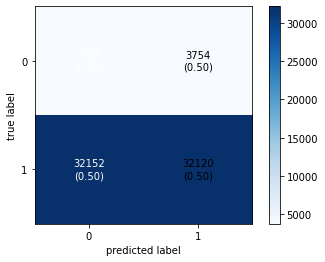

              precision    recall  f1-score   support

        Fake       0.10      0.50      0.17      7520
        Real       0.90      0.50      0.64     64272

    accuracy                           0.50     71792
   macro avg       0.50      0.50      0.41     71792
weighted avg       0.81      0.50      0.59     71792



In [ ]:
# How good is this score? What can we compare it against? Let's look at a dummy classifier:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()

# Pipe the features and classfier together
pipe = Pipeline([('features', features),
                 ('clf', clf)])

Dummy_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/dummy_model_upsampled1.sav")
# Dummy_model = pipe.fit(X_train, y_train)
prediction = Dummy_model.predict(X_test)

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# from sklearn.metrics import roc_auc_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = metrics.f1_score(y_test, prediction)
print("Model: Dummy Classifier")
print("Accuracy score:   %0.6f" % (metrics.accuracy_score(y_test, prediction)))
print("F1 score:   %0.6f" % (score*100))
print("Recall score:   %0.6f" % (recall_score(y_test, prediction)))
print("Precison score:   %0.6f" % (precision_score(y_test, prediction)))

# cm = metrics.confusion_matrix(y_test, prediction)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=['Fake','Real']))

Model: Multinomial Naive Bayes
Accuracy score:   0.527106
F1 score:   65.107914
Recall score:   0.492827
Precison score:   0.959035


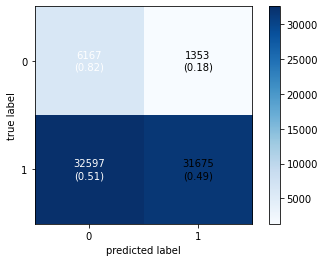

              precision    recall  f1-score   support

        Fake       0.16      0.82      0.27      7520
        Real       0.96      0.49      0.65     64272

    accuracy                           0.53     71792
   macro avg       0.56      0.66      0.46     71792
weighted avg       0.88      0.53      0.61     71792



In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

# Pipe the features and classfier together
pipe = Pipeline([('features', features),
                 ('clf', clf)])


NB_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/bayes_model_upsampled1.sav")
# NB_model = pipe.fit(X_train, y_train)
prediction = NB_model.predict(X_test)

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# from sklearn.metrics import roc_auc_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = metrics.f1_score(y_test, prediction)
print("Model: Multinomial Naive Bayes")
print("Accuracy score:   %0.6f" % (metrics.accuracy_score(y_test, prediction)))
print("F1 score:   %0.6f" % (score*100))
print("Recall score:   %0.6f" % (recall_score(y_test, prediction)))
print("Precison score:   %0.6f" % (precision_score(y_test, prediction)))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])


fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=['Fake','Real']))

# save the model to disk
# import pickle
# filename = '/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/bayes_model_upsampled1.sav'
# pickle.dump(NB_model, open(filename, 'wb'))

Model: Support Vector Machine
Accuracy score:   0.895253
F1 score:   94.473189
Recall score:   1.000000
Precison score:   0.895253


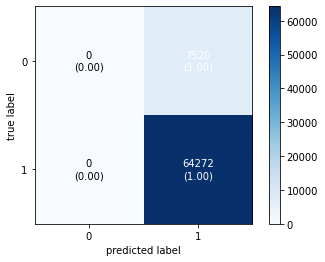

              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00      7520
        Real       0.90      1.00      0.94     64272

    accuracy                           0.90     71792
   macro avg       0.45      0.50      0.47     71792
weighted avg       0.80      0.90      0.85     71792



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Support Vector Machine
from sklearn.svm import LinearSVC
clf = LinearSVC()

# Pipe the features and classfier together
pipe = Pipeline([('features', features),
                 ('clf', clf)])

svm_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/svm_model_upsampled1.sav")
# svm_model = pipe.fit(X_train, y_train)
prediction = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = metrics.f1_score(y_test, prediction)
print("Model: Support Vector Machine")
print("Accuracy score:   %0.6f" % (metrics.accuracy_score(y_test, prediction)))
print("F1 score:   %0.6f" % (score*100))
print("Recall score:   %0.6f" % (recall_score(y_test, prediction)))
print("Precison score:   %0.6f" % (precision_score(y_test, prediction)))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])


fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=['Fake','Real']))

# save the model to disk
# import pickle
# filename = '/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/svm_model_upsampled1.sav'
# pickle.dump(svm_model, open(filename, 'wb'))

Model: Passive Aggressive Classifier
Accuracy score:   0.104747
F1 score:   0.000000
Recall score:   0.000000
Precison score:   0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


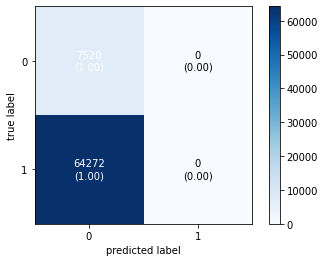

              precision    recall  f1-score   support

        Fake       0.10      1.00      0.19      7520
        Real       0.00      0.00      0.00     64272

    accuracy                           0.10     71792
   macro avg       0.05      0.50      0.09     71792
weighted avg       0.01      0.10      0.02     71792



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier()

# Pipe the features and classfier together
pipe = Pipeline([('features', features),
                 ('clf', clf)])

pac_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/pac_model_upsampled1.sav")
# pac_model = pipe.fit(X_train, y_train)
prediction = pac_model.predict(X_test)

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# from sklearn.metrics import roc_auc_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = metrics.f1_score(y_test, prediction)
print("Model: Passive Aggressive Classifier")
print("Accuracy score:   %0.6f" % (metrics.accuracy_score(y_test, prediction)))
print("F1 score:   %0.6f" % (score*100))
print("Recall score:   %0.6f" % (recall_score(y_test, prediction)))
print("Precison score:   %0.6f" % (precision_score(y_test, prediction)))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])


fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=['Fake','Real']))

# save the model to disk
# import pickle
# filename = '/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/pac_model_upsampled1.sav'
# pickle.dump(pac_model, open(filename, 'wb'))

Model: Logistic Regression
Accuracy score:   0.104747
F1 score:   0.000000
Recall score:   0.000000
Precison score:   0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


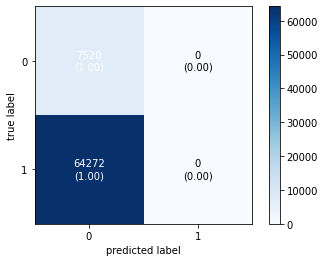

              precision    recall  f1-score   support

        Fake       0.10      1.00      0.19      7520
        Real       0.00      0.00      0.00     64272

    accuracy                           0.10     71792
   macro avg       0.05      0.50      0.09     71792
weighted avg       0.01      0.10      0.02     71792



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Pipe the features and classfier together
pipe = Pipeline([('features', features),
                 ('clf', clf)])

logistic_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/logistic_model_upsampled1.sav")
# logistic_model = pipe.fit(X_train, y_train)
prediction = logistic_model.predict(X_test)

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# from sklearn.metrics import roc_auc_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = metrics.f1_score(y_test, prediction)
print("Model: Logistic Regression")
print("Accuracy score:   %0.6f" % (metrics.accuracy_score(y_test, prediction)))
print("F1 score:   %0.6f" % (score*100))
print("Recall score:   %0.6f" % (recall_score(y_test, prediction)))
print("Precison score:   %0.6f" % (precision_score(y_test, prediction)))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])


fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=['Fake','Real']))

# save the model to disk
# import pickle
# filename = '/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/logistic_model_upsampled1.sav'
# pickle.dump(logistic_model, open(filename, 'wb'))

Model: XGBoost Classifier
Accuracy score:   0.634472
F1 score:   75.189093
Recall score:   0.618668
Precison score:   0.958237


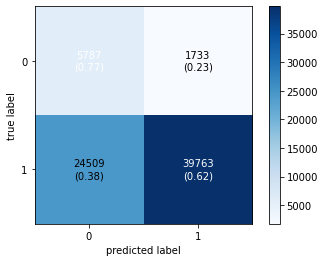

              precision    recall  f1-score   support

        Fake       0.19      0.77      0.31      7520
        Real       0.96      0.62      0.75     64272

    accuracy                           0.63     71792
   macro avg       0.57      0.69      0.53     71792
weighted avg       0.88      0.63      0.71     71792



In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier
clf = XGBClassifier()

# Pipe the features and classfier together
pipe = Pipeline([('features', features),
                 ('clf', clf)])

xgboost_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/xgboost_model_upsampled1.sav")
# xgboost_model = pipe.fit(X_train, y_train)
prediction = xgboost_model.predict(X_test)


from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# from sklearn.metrics import roc_auc_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = metrics.f1_score(y_test, prediction)
print("Model: XGBoost Classifier")
print("Accuracy score:   %0.6f" % (metrics.accuracy_score(y_test, prediction)))
print("F1 score:   %0.6f" % (score*100))
print("Recall score:   %0.6f" % (recall_score(y_test, prediction)))
print("Precison score:   %0.6f" % (precision_score(y_test, prediction)))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])


fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=['Fake','Real']))

# save the model to disk
# import pickle
# filename = '/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/xgboost_model_upsampled1.sav'
# pickle.dump(xgboost_model, open(filename, 'wb'))

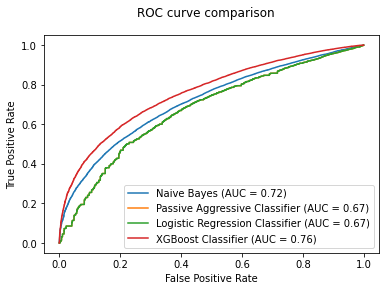

In [ ]:
# ROC curve comparison
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

nb_disp = plot_roc_curve(NB_model, X_test, y_test, name = 'Naive Bayes')
# svm_disp = plot_roc_curve(svm_model, X_test, y_test, ax=nb_disp.ax_, name='SVM')
pca_disp = plot_roc_curve(pac_model, X_test, y_test, ax=nb_disp.ax_, name='Passive Aggressive Classifier')
lr_disp = plot_roc_curve(logistic_model, X_test, y_test, ax=nb_disp.ax_, name='Logistic Regression Classifier')
xgb_disp = plot_roc_curve(xgboost_model, X_test, y_test, ax=nb_disp.ax_, name='XGBoost Classifier')
xgb_disp.figure_.suptitle("ROC curve comparison")

plt.show()

### Part3.2: Contextual embedding based training approach - T5.

In [ ]:
!pip install pytorch_lightning==0.7.6

     |████████████████████████████████| 256kB 4.1MB/s 
     |████████████████████████████████| 829kB 57.7MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=1dcbfe902273af3051b8eeefe6659ccaec984b48b66840567f1abc74a29e3598
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8MB 5.7MB/s 
     |████████████████████████████████| 133kB 25.4MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
     |████████████████████████████████| 174kB 25.0MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=b77063680132911f9754331b9ce00fea2809af65c4b9c7be9adf0e4e59961ca4
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=c7b40783cfa5efda8474e7d6e949c1dbae4ed61a95d13ed347488bcae75337ca
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [ ]:
!pip install transformers==4.6.0

     |████████████████████████████████| 2.3MB 4.0MB/s 
     |████████████████████████████████| 3.3MB 46.1MB/s 
     |████████████████████████████████| 901kB 70.2MB/s 


In [ ]:
!pip install nlp

     |████████████████████████████████| 1.7MB 4.1MB/s 
     |████████████████████████████████| 245kB 56.8MB/s 


In [ ]:
!pip install SentencePiece

     |████████████████████████████████| 1.2MB 5.5MB/s 


In [ ]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Using T5 model #9b682144b97dd618fd731b55f8b6d7ecfac21c39
from pytorch_lightning.loggers.wandb import WandbLogger
import os
from pathlib import Path
from string import punctuation

os.environ["WANDB_API_KEY"] = "9b682144b97dd618fd731b55f8b6d7ecfac21c39"
wandb_logger = WandbLogger(project='fakereview-t5base')

In [ ]:
model_name = "t5-base"
token_len = 512
model_prefix = f"{model_name}-{token_len}"

In [ ]:
import argparse
import glob
import os
import json
import time
import logging
import random
import re
from itertools import chain
from string import punctuation

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import string
import pandas as pd
# pd.set_option('display.max_colwidth', -1)
import numpy as np
import torch
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.loggers import WandbLogger
from nlp import load_metric

from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5Tokenizer,
    get_linear_schedule_with_warmup
)
import random
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")

Mounted at /content/drive


In [ ]:
# No nan in our dataset
combined_data.isna().sum()

usr_id          0
prod_id         0
prod_rating     0
review_label    0
rating_date     0
usr_name        0
prod_name       0
text            0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import sentencepiece

df = combined_data.copy()

class ReviewsData(Dataset):
    def __init__(self, df, tokenizer, type_path, num_samples, input_length=4096, output_length=4096, print_text=False):         
        ## Shuffle data set
        df = df.sample(frac=1, random_state=1)
        self.dataset = []
        val_size = int(0.2 * df.shape[0])

        inps = df["text"].values.tolist()
        lbls = df["review_label"].values.tolist()

        for i, inp in enumerate(inps):
            inp = inp.replace(":", "")
            inp = "classify: " + inp
            lbl = str(lbls[i])
            self.dataset.append({"inp": inp, "lbl": lbl})
        
        if type_path == "train":
            self.dataset = self.dataset[:len(self.dataset) - val_size]
        elif type_path == "validation":
            self.dataset = self.dataset[len(self.dataset) - val_size:]

        if num_samples:
            self.dataset = self.dataset[:num_samples]
        
        # print(len(self.dataset))

        self.input_length = input_length
        self.tokenizer = tokenizer
        self.output_length = output_length
        self.print_text = print_text
        
  
    def __len__(self):
        return len(self.dataset)

    def convert_to_features(self, example_batch):
        
        input_ = example_batch['inp']
        target_ = example_batch['lbl']
        
        input_ = input_.strip()

        
        source = self.tokenizer.batch_encode_plus([input_], max_length=self.input_length, 
                                                     padding='max_length', truncation=True, return_tensors="pt")
        
        targets = self.tokenizer.batch_encode_plus([target_], max_length=3, 
                                                     padding='max_length', truncation=True, return_tensors="pt")

        return source, targets
  
    def __getitem__(self, index):
        source, targets = self.convert_to_features(self.dataset[index])
        
        
        if self.print_text:
            print("Lens are: ", source['input_ids'][0].shape, targets['input_ids'][0].shape)
        
        source_ids = source["input_ids"].squeeze()
        target_ids = targets["input_ids"].squeeze()

        # return {"source_ids": source_ids, "target_ids": target_ids}

        src_mask    = source["attention_mask"].squeeze()
        target_mask = targets["attention_mask"].squeeze()

        return {"source_ids": source_ids, "source_mask": src_mask, "target_ids": target_ids, "target_mask": target_mask}



def get_dataset(tokenizer, type_path, num_samples, args, df=df):
      return ReviewsData(df = df, tokenizer=tokenizer, type_path=type_path, num_samples=num_samples, input_length=args.max_input_length, 
                        output_length=args.max_output_length)

In [ ]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')
dataset = ReviewsData(combined_data, tokenizer, 'validation', None, token_len, 512, True)
len(dataset)

71791

In [ ]:
data = dataset[5]
print()
print("Shape of Tokenized Text: ", data['source_ids'].shape)
print()
print("Sanity check - Decode Text: ", tokenizer.decode(data['source_ids']))
print("====================================")
print("Sanity check - Decode Classification: ", tokenizer.decode(data['target_ids']))

Lens are:  torch.Size([512]) torch.Size([3])

Shape of Tokenized Text:  torch.Size([512])

Sanity check - Decode Text:  classify: we went for the tail end of the brunch...around 230 PM on a saturday. other than being semi-rushed out so they could prepare for the dinner rush (which i get---i was a waitress back in the day), the meal was perfect. the french ( i think) waiter we had was perfect. not snobby at all, which i keep reading here. the black label burgers were insane. and the check was worth every single dime paid. all the hype in these reviews are silly. the burger is the best in town. just face it and GO!</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

In [ ]:
def exact_match_score(prediction, ground_truth):
    return int(normalize_answer(prediction) == normalize_answer(ground_truth))

In [ ]:
def calculate_scores(predictions, ground_truths):
    em_score = 0
    subset_match_score = 0
    
    for i in range(len(predictions)):
        ground_truth = ground_truths[i]
        prediction = predictions[i]
        em_score +=  exact_match_score(prediction, ground_truth)
    
    em_score /= len(predictions)
    return em_score*100

In [ ]:
def normalize_answer(s):
    """Lower text and remove punctuation, articles and extra whitespace."""

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix((remove_punc(lower(s))))

In [ ]:
class T5FakeReviewDetector(pl.LightningModule):
  def __init__(self, hparams):
      super(T5FakeReviewDetector, self).__init__()
      self.hparams = hparams        
      self.model = T5ForConditionalGeneration.from_pretrained(hparams.model_name_or_path, return_dict=True)
      self.tokenizer = T5Tokenizer.from_pretrained(hparams.tokenizer_name_or_path, max_length=hparams.max_input_length)
      self.output_dir = Path(self.hparams.output_dir)
      self.step_count = 0
      
      if self.hparams.freeze_embeds:
          self.freeze_embeds()
      if self.hparams.freeze_encoder:
          self.freeze_params(self.model.get_encoder())
          assert_all_frozen(self.model.get_encoder())
          
          
      n_observations_per_split = {
          "train": self.hparams.n_train,
          "validation": self.hparams.n_val,
          "test": self.hparams.n_test,
      }
      self.n_obs = {k: v if v >= 0 else None for k, v in n_observations_per_split.items()}
      self.em_score_list = []

  def freeze_params(self, model):
      for par in model.parameters():
          par.requires_grad = False
          
  def freeze_embeds(self):
      try:
          self.freeze_params(self.model.model.shared)
          for d in [self.model.model.encoder, self.model.model.decoder]:
              freeze_params(d.embed_positions)
              freeze_params(d.embed_tokens)
      except AttributeError:
          self.freeze_params(self.model.shared)
          for d in [self.model.encoder, self.model.decoder]:
              self.freeze_params(d.embed_tokens)

  def lmap(self, f, x):
      return list(map(f, x))

  def is_logger(self):
      return self.trainer.proc_rank <= 0
  
  def parse_score(self, result):
      return {k: round(v.mid.fmeasure * 100, 4) for k, v in result.items()}
      
  def forward(self, input_ids, attention_mask=None, decoder_input_ids=None, decoder_attention_mask=None, lm_labels=None):
      return self.model(
              input_ids,
              attention_mask=attention_mask,
              decoder_input_ids=decoder_input_ids,
              decoder_attention_mask=decoder_attention_mask,
              labels=lm_labels
          )

  def _step(self, batch):
      labels = batch["target_ids"]
      labels[labels[:, :] == self.tokenizer.pad_token_id] = -100

      outputs = self(
          input_ids=batch["source_ids"],
          attention_mask=batch["source_mask"],
          lm_labels=labels,
          decoder_attention_mask=batch['target_mask']
      )

      loss = outputs[0]

      return loss
  
  def ids_to_clean_text(self, generated_ids):
      gen_text = self.tokenizer.batch_decode(
          generated_ids,
          skip_special_tokens=True, 
          clean_up_tokenization_spaces=True
      )
      return self.lmap(str.strip, gen_text)
  
  def _generative_step(self, batch) :
      
      t0 = time.time()
      # print(batch)
      inp_ids = batch["source_ids"]
      
      generated_ids = self.model.generate(
          batch["source_ids"],
          attention_mask=batch["source_mask"],
          use_cache=True,
          decoder_attention_mask=batch['target_mask'],
          max_length=3

      )
      preds = self.ids_to_clean_text(generated_ids)
      target = self.ids_to_clean_text(batch["target_ids"])
#         print("Preds and Targets: ", preds, target)
          
      gen_time = (time.time() - t0) / batch["source_ids"].shape[0]  
  
      loss = self._step(batch)
      base_metrics = {'val_loss': loss}
      summ_len = np.mean(self.lmap(len, generated_ids))
      base_metrics.update(gen_time=gen_time, gen_len=summ_len, preds=preds, target=target)
      em_score  = calculate_scores(preds, target)
      
      self.em_score_list.append(em_score)
      
      em_score = torch.tensor(em_score,dtype=torch.float32)
  
      base_metrics.update(accuracy=em_score)
      
      return base_metrics

  def training_step(self, batch, batch_idx):
      loss = self._step(batch)

      tensorboard_logs = {"train_loss": loss}
      return {"loss": loss, "log": tensorboard_logs}

  def training_epoch_end(self, outputs):
      avg_train_loss = torch.stack([x["loss"] for x in outputs]).mean()
      tensorboard_logs = {"avg_train_loss": avg_train_loss}
      return {"avg_train_loss": avg_train_loss, "log": tensorboard_logs, 'progress_bar': tensorboard_logs}

  def validation_step(self, batch, batch_idx):
      return self._generative_step(batch)
  
  def validation_epoch_end(self, outputs):
      
      avg_loss = torch.stack([x["val_loss"] for x in outputs]).mean()
      tensorboard_logs = {"val_loss": avg_loss}
      
      if len(self.em_score_list) <= 2:
          average_em_score = sum(self.em_score_list) / len(self.em_score_list) 
          
      else:
          latest_em_score = self.em_score_list[:-2]
          average_em_score = sum(latest_em_score) / len(latest_em_score) 
      
      average_em_score = torch.tensor(average_em_score,dtype=torch.float32)
      tensorboard_logs.update(accuracy=average_em_score)
      
      self.target_gen= []
      self.prediction_gen=[]
      return {"avg_val_loss": avg_loss, 
              "accuracy" : average_em_score,
              "log": tensorboard_logs, 'progress_bar': tensorboard_logs}

  def configure_optimizers(self):

      model = self.model
      no_decay = ["bias", "LayerNorm.weight"]
      optimizer_grouped_parameters = [
          {
              "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
              "weight_decay": self.hparams.weight_decay,
          },
          {
              "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
              "weight_decay": 0.0,
          },
      ]
      optimizer = AdamW(optimizer_grouped_parameters, lr=self.hparams.learning_rate, eps=self.hparams.adam_epsilon)
      self.opt = optimizer
      return [optimizer]

  def optimizer_step(self, epoch, batch_idx, optimizer, optimizer_idx, second_order_closure=None, using_native_amp=None):
      if self.trainer.use_tpu:
          xm.optimizer_step(optimizer)
      else:
          optimizer.step()
      optimizer.zero_grad()
      self.lr_scheduler.step()

  def get_tqdm_dict(self):
      tqdm_dict = {"loss": "{:.3f}".format(self.trainer.avg_loss), "lr": self.lr_scheduler.get_last_lr()[-1]}

      return tqdm_dict
  
  def train_dataloader(self):   
      n_samples = self.n_obs['train']
      train_dataset = get_dataset(tokenizer=self.tokenizer, type_path="train", num_samples=n_samples, args=self.hparams)
      dataloader = DataLoader(train_dataset, batch_size=self.hparams.train_batch_size, drop_last=True, shuffle=True, num_workers=4)
      t_total = (
          (len(dataloader.dataset) // (self.hparams.train_batch_size * max(1, self.hparams.n_gpu)))
          // self.hparams.gradient_accumulation_steps
          * float(self.hparams.num_train_epochs)
      )
      scheduler = get_linear_schedule_with_warmup(
          self.opt, num_warmup_steps=self.hparams.warmup_steps, num_training_steps=t_total
      )
      self.lr_scheduler = scheduler

      return dataloader

  def val_dataloader(self):
      n_samples = self.n_obs['validation']
      validation_dataset = get_dataset(tokenizer=self.tokenizer, type_path="validation", num_samples=n_samples, args=self.hparams)
      
      return DataLoader(validation_dataset, batch_size=self.hparams.eval_batch_size, num_workers=4)
  
  # def test_dataloader(self):
  #     n_samples = self.n_obs['test']
  #     test_dataset = get_dataset(tokenizer=self.tokenizer, type_path="test", num_samples=n_samples, args=self.hparams)
      
  #     return DataLoader(test_dataset, batch_size=self.hparams.eval_batch_size, num_workers=4)
  
  def on_save_checkpoint(self, checkpoint):
      save_path = self.output_dir.joinpath(model_prefix)
      self.model.config.save_step = self.step_count
      self.model.save_pretrained(save_path)
      self.tokenizer.save_pretrained(save_path)

In [ ]:
logger = logging.getLogger(__name__)

class LoggingCallback(pl.Callback):
  def on_validation_end(self, trainer, pl_module):
    logger.info("***** Validation results *****")
    if pl_module.is_logger():
      metrics = trainer.callback_metrics
      # Log results
      for key in sorted(metrics):
        if key not in ["log", "progress_bar"]:
          logger.info("{} = {}\n".format(key, str(metrics[key])))

  def on_test_end(self, trainer, pl_module):
    logger.info("***** Test results *****")

    if pl_module.is_logger():
      metrics = trainer.callback_metrics

      # Log and save results to file
      output_test_results_file = os.path.join(pl_module.hparams.output_dir, "test_results.txt")
      with open(output_test_results_file, "w") as writer:
        for key in sorted(metrics):
          if key not in ["log", "progress_bar"]:
            logger.info("{} = {}\n".format(key, str(metrics[key])))
            writer.write("{} = {}\n".format(key, str(metrics[key])))

In [ ]:
args_dict = dict(
    output_dir="", # path to save the checkpoints
    model_name_or_path= model_name,
    tokenizer_name_or_path= model_name,
    max_input_length=token_len,
    max_output_length=token_len,
    freeze_encoder=False,
    freeze_embeds=False,
    learning_rate=3e-4,
    weight_decay=0.0,
    adam_epsilon=1e-8,
    warmup_steps=0,
    train_batch_size=1,
    eval_batch_size=1,
    num_train_epochs=10,
    gradient_accumulation_steps=8,
    n_gpu=1,
    resume_from_checkpoint=None, 
    val_check_interval = 0.5, 
    n_val=-1,
    n_train=-1,
    n_test=-1,
    early_stop_callback=False,
    fp_16=False, # if you want to enable 16-bit training then install apex and set this to true
    opt_level='O1', # you can find out more on optimisation levels here https://nvidia.github.io/apex/amp.html#opt-levels-and-properties
    max_grad_norm=1.0, # if you enable 16-bit training then set this to a sensible value, 0.5 is a good default
    seed=42,
)


args_dict.update({'output_dir': "/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/" + model_prefix + "_epoch1", 'num_train_epochs':1,
             'train_batch_size': 8, 'eval_batch_size': 8})
args = argparse.Namespace(**args_dict)


## Define Checkpoint function
checkpoint_callback = pl.callbacks.ModelCheckpoint(
    filepath="./" + model_prefix + "checkpoint", prefix = model_prefix,monitor="val_loss", mode="min", save_top_k=5
)

In [ ]:
## If resuming from checkpoint, add an arg resume_from_checkpoint
train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level=args.opt_level,
    resume_from_checkpoint=args.resume_from_checkpoint,
    gradient_clip_val=args.max_grad_norm,
    checkpoint_callback=checkpoint_callback,
    val_check_interval=args.val_check_interval,
    logger=wandb_logger,
    callbacks=[LoggingCallback()],
    # progress_bar_refresh_rate=0
)

model = T5FakeReviewDetector(args)
trainer = pl.Trainer(**train_params)

GPU available: True, used: True
GPU available: True, used: True
GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
No environment variable for node rank defined. Set as 0.
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
CUDA_VISIBLE_DEVICES: [0]
CUDA_VISIBLE_DEVICES: [0]


In [ ]:
trainer.fit(model)

wandb: Currently logged in as: zjc664656505 (use `wandb login --relogin` to force relogin)



    | Name                                                                | Type                       | Params
---------------------------------------------------------------------------------------------------------------
0   | model                                                               | T5ForConditionalGeneration | 222 M 
1   | model.shared                                                        | Embedding                  | 24 M  
2   | model.encoder                                                       | T5Stack                    | 109 M 
3   | model.encoder.block                                                 | ModuleList                 | 84 M  
4   | model.encoder.block.0                                               | T5Block                    | 7 M   
5   | model.encoder.block.0.layer                                         | ModuleList                 | 7 M   
6   | model.encoder.block.0.layer.0                                       | T5LayerSelfAttention       

1

In [ ]:
import textwrap
from tqdm.auto import tqdm
import torch

torch.cuda.empty_cache()
torch.cuda.memory_summary()

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [ ]:
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/t5-base-512_epoch3/t5-base-512/")

In [ ]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')
dataset = dataset = ReviewsData(df, tokenizer, 'validation', None, 128, 3, True)

In [ ]:
#Evaluation step @Junchen
loader = DataLoader(dataset, batch_size=32, shuffle=True)
it = iter(loader)
batch = next(it)
batch["source_ids"].shape

Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are: 

torch.Size([32, 128])

In [ ]:
model.to('cuda')
outs = model.generate(
            batch["source_ids"].cuda(),
            attention_mask=batch["source_mask"].cuda(),
            use_cache=True,
            decoder_attention_mask=batch['target_mask'].cuda(),
        )

prediction = [int(i) for i in [tokenizer.batch_decode(ids, skip_special_tokens= True)[1] if tokenizer.batch_decode(ids, skip_special_tokens= True)[1] != "" else tokenizer.batch_decode(ids, skip_special_tokens= True)[2]for ids in outs]]
targets = [int(i) for i in [tokenizer.batch_decode(ids, skip_special_tokens= True)[0] if tokenizer.batch_decode(ids, skip_special_tokens= True)[0] != "" else tokenizer.batch_decode(ids, skip_special_tokens= True)[1] for ids in batch['target_ids']] ]
texts = [tokenizer.decode(ids) for ids in batch['source_ids']]

In [ ]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score

# This is the current result of training our T5 model with 3 epoch. The result should be higher with more training epoches. I'm doing it right now.
score = metrics.f1_score(targets, prediction)
print("F1 score:   %0.3f" % (score*100))
print("Accuracy score:   %0.3f" % (metrics.accuracy_score(targets, prediction)))

F1 score:   96.774
Accuracy score:   0.938


In [ ]:
#Sample output

for i in range(32):
    lines = textwrap.wrap("Input Text:\n%s\n" % texts[i], width=100)
    print("\n".join(lines))
    print("\nActual Class: %s" % targets[i])
    print("\nPredicted Class from T5: %s" % prediction[i])
    print("=====================================================================\n")

Input Text: classify: My family and I have been coming here for years. Its not a place where you
come to eat but just order take out. They wont take orders over the phone so you have to come and
wait but it goes by fast. When I decided I didn't want to go out to dinner for my bday I couldn't
think of a better place to order inexpensive fast food then here. I always get the chicken since its
very juicy and great flavor, pork fried rice and fried yucca (cassava). I'm a big fan of their</s>

Actual Class: 1

Predicted Class from T5: 1

Input Text: classify: Another winner for brunch places in Brooklyn! Between the hype that causes BK
restaurants to jam-packed during the hours of 11-2 every weekend, hipster servers who view their job
duties as suggestions rather than requirements, and the food that is always more style than
substance, it's important to separate the good places from the bad. I'm loving Martha's cozy wood
and tile interior and funky decor. It just feels friendly, and the ser

### Part3.3: Contextual embedding based training approach - BERT.

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8MB 3.9MB/s 
     |████████████████████████████████| 174kB 26.2MB/s 
     |████████████████████████████████| 133kB 28.3MB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=7a1dad7f4b2af98b35553e6ad97de14a4d55d8445ffb2ee0d41cb86aabd743b6
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=87bb6d224a238e8d1c61e681d72a149bf5831c102058418d61e5b6140e1a4741
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Install Specific Versions
!pip install sentencepiece
!pip install pytorch_lightning==0.7.6
!pip install nltk
!pip install nltk
!pip install transformers

# Import Packages
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

     |████████████████████████████████| 1.2MB 4.0MB/s 
     |████████████████████████████████| 256kB 3.9MB/s 
     |████████████████████████████████| 829kB 17.1MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=f4b2515f71154d9ef0efc13be3fd6674b6de9fbf5c61676d05d3a24a96816499
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
     |████████████████████████████████| 2.3MB 4.0MB/s 
     |████████████████████████████████| 901kB 26.2MB/s 
     |████████████████████████████████| 3.3MB 33.4MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /

True

In [ ]:
# Using BERT model #9b682144b97dd618fd731b55f8b6d7ecfac21c39
from pytorch_lightning.loggers.wandb import WandbLogger
import os
from pathlib import Path
from string import punctuation
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from transformers import XLMModel, BertTokenizer, BertForSequenceClassification, RobertaTokenizerFast, RobertaForSequenceClassification
from transformers import AdamW
import nltk
from nltk.stem import 	WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

os.environ["WANDB_API_KEY"] = "9b682144b97dd618fd731b55f8b6d7ecfac21c39"
wandb_logger = WandbLogger(project='fakereview-BERT')

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")
# combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/downsampled_data.csv")

Mounted at /content/drive


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [ ]:
MAX_LEN = 128 # max token length
#splitting data for training and testing
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(combined_data['text'],combined_data['review_label'],test_size=0.2, random_state = 1)

In [ ]:
train_sentences = [i for i in x_train]
val_sentences = [i for i in x_test]

train_labels = [0 if i == -1 else i for i in y_train]
val_labels = [0 if i == -1 else i for i in y_test]

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
def Encode_TextWithAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=True):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids'],encoded_dict['attention_mask']

def Encode_TextWithoutAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=False):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids']

def get_TokenizedTextWithAttentionMask(sentenceList, tokenizer):
    token_ids_list,attention_mask_list = [],[]
    for sentence in sentenceList:
        token_ids,attention_mask = Encode_TextWithAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
        attention_mask_list.append(attention_mask)
    return token_ids_list,attention_mask_list

def get_TokenizedText(sentenceList, tokenizer):
    token_ids_list = []
    for sentence in sentenceList:
        token_ids = Encode_TextWithoutAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
    return token_ids_list

In [ ]:
train_token_ids,train_attention_masks = torch.tensor(get_TokenizedTextWithAttentionMask([i for i in train_sentences],tokenizer))
val_token_ids,val_attention_masks = torch.tensor(get_TokenizedTextWithAttentionMask([i for i in val_sentences],tokenizer))

#Error fixed, just continue @Junchen
#This part is tokenizing the input text document using the word embedding tokenizer, which may take a very long time. Around half hour.@ Junchen

In [ ]:
train_labels = torch.tensor([i for i in train_labels])
val_labels = torch.tensor([i for i in val_labels])

In [ ]:
batch_size = 32

train_data = TensorDataset(train_token_ids, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(val_token_ids, val_attention_masks, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
train_loss_set = []
best_val_accuracy = 0.85
epochs = 15

for _ in trange(epochs, desc="Epoch"):
    model.train()
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
  
    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        optimizer.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
        if (nb_tr_steps % 100) == 0:
          print("Step {} with training loss: {}".format(nb_tr_steps, loss))
        train_loss_set.append(loss.item())    
        loss.backward()
        optimizer.step()

        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))

    model.eval()

    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
          output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
          logits = output[0]

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
    Validation_Accuracy = (eval_accuracy/nb_eval_steps)
    if(Validation_Accuracy >= best_val_accuracy):
        torch.save(model.state_dict(), "/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model"+'BERT_base_uncased_best_model.ckpt')
        best_val_accuracy = Validation_Accuracy
        print('Model Saved')

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Step 0 with training loss: 0.9114907383918762
Step 100 with training loss: 0.3758375644683838
Step 200 with training loss: 0.4778502881526947
Step 300 with training loss: 0.17409181594848633
Step 400 with training loss: 0.2759847342967987
Step 500 with training loss: 0.38217782974243164
Step 600 with training loss: 0.24557098746299744
Step 700 with training loss: 0.308343768119812
Step 800 with training loss: 0.5360339283943176
Step 900 with training loss: 0.19900394976139069
Step 1000 with training loss: 0.09758129715919495
Step 1100 with training loss: 0.39567089080810547
Step 1200 with training loss: 0.28922390937805176
Step 1300 with training loss: 0.2282765805721283
Step 1400 with training loss: 0.1590813547372818
Step 1500 with training loss: 0.33046767115592957
Step 1600 with training loss: 0.44777995347976685
Step 1700 with training loss: 0.2454489767551422
Step 1800 with training loss: 0.21572808921337128
Step 1900 with training loss: 0.3929038345813751
Step 2000 with training

Epoch:  10%|█         | 1/10 [2:15:30<20:19:38, 8130.95s/it]

Model Saved
Step 0 with training loss: 0.35624706745147705
Step 100 with training loss: 0.30860427021980286
Step 200 with training loss: 0.17267337441444397
Step 300 with training loss: 0.42898908257484436
Step 400 with training loss: 0.23636648058891296
Step 500 with training loss: 0.2692519426345825
Step 600 with training loss: 0.29825296998023987
Step 700 with training loss: 0.1892615109682083
Step 800 with training loss: 0.6398250460624695
Step 900 with training loss: 0.35659560561180115
Step 1000 with training loss: 0.2466147243976593
Step 1100 with training loss: 0.16971512138843536
Step 1200 with training loss: 0.22889821231365204
Step 1300 with training loss: 0.10648315399885178
Step 1400 with training loss: 0.12506037950515747
Step 1500 with training loss: 0.41356679797172546
Step 1600 with training loss: 0.33960777521133423
Step 1700 with training loss: 0.298598974943161
Step 1800 with training loss: 0.038973525166511536
Step 1900 with training loss: 0.288499116897583
Step 20

Epoch:  20%|██        | 2/10 [4:31:03<18:04:11, 8131.41s/it]

Validation Accuracy: 0.8949281417112299
Step 0 with training loss: 0.1565801501274109
Step 100 with training loss: 0.050158388912677765
Step 200 with training loss: 0.3349035382270813
Step 300 with training loss: 0.3104252815246582
Step 400 with training loss: 0.24703046679496765
Step 500 with training loss: 0.35827016830444336
Step 600 with training loss: 0.29016607999801636
Step 700 with training loss: 0.40938642621040344
Step 800 with training loss: 0.2394922375679016
Step 900 with training loss: 0.20540626347064972
Step 1000 with training loss: 0.4391961395740509
Step 1100 with training loss: 0.17205524444580078
Step 1200 with training loss: 0.10805093497037888
Step 1300 with training loss: 0.31731152534484863
Step 1400 with training loss: 0.17342038452625275
Step 1500 with training loss: 0.2739051878452301
Step 1600 with training loss: 0.28104814887046814
Step 1700 with training loss: 0.09601811319589615
Step 1800 with training loss: 0.25161319971084595
Step 1900 with training los

Epoch:  30%|███       | 3/10 [6:46:32<15:48:35, 8130.72s/it]

Validation Accuracy: 0.8933823529411765
Step 0 with training loss: 0.1519462615251541
Step 100 with training loss: 0.2776280343532562
Step 200 with training loss: 0.15364521741867065
Step 300 with training loss: 0.17156487703323364
Step 400 with training loss: 0.19369825720787048
Step 500 with training loss: 0.08375892043113708
Step 600 with training loss: 0.2563718855381012
Step 700 with training loss: 0.23934012651443481
Step 800 with training loss: 0.23777563869953156
Step 900 with training loss: 0.15565015375614166
Step 1000 with training loss: 0.09883126616477966
Step 1100 with training loss: 0.18005874752998352
Step 1200 with training loss: 0.18430179357528687
Step 1300 with training loss: 0.2537052035331726
Step 1400 with training loss: 0.20016641914844513
Step 1500 with training loss: 0.06957419216632843
Step 1600 with training loss: 0.04608243331313133
Step 1700 with training loss: 0.020431125536561012
Step 1800 with training loss: 0.13550902903079987
Step 1900 with training l

Epoch:  40%|████      | 4/10 [9:01:47<13:32:36, 8126.01s/it]

Validation Accuracy: 0.8891209893048129
Step 0 with training loss: 0.06104840338230133
Step 100 with training loss: 0.07519814372062683
Step 200 with training loss: 0.08639363944530487
Step 300 with training loss: 0.15115714073181152
Step 400 with training loss: 0.14198845624923706
Step 500 with training loss: 0.12415280938148499
Step 600 with training loss: 0.2903146743774414
Step 700 with training loss: 0.05193543806672096
Step 800 with training loss: 0.1896352469921112
Step 900 with training loss: 0.027880368754267693
Step 1000 with training loss: 0.15342526137828827
Step 1100 with training loss: 0.04494751617312431
Step 1200 with training loss: 0.02848426252603531
Step 1300 with training loss: 0.026794489473104477
Step 1400 with training loss: 0.21185235679149628
Step 1500 with training loss: 0.10377603024244308
Step 1600 with training loss: 0.04593413695693016
Step 1700 with training loss: 0.15292759239673615
Step 1800 with training loss: 0.051930416375398636
Step 1900 with traini

Epoch:  50%|█████     | 5/10 [11:16:48<11:16:32, 8118.49s/it]

Validation Accuracy: 0.8817123440285205
Step 0 with training loss: 0.13438783586025238
Step 100 with training loss: 0.06619272381067276
Step 200 with training loss: 0.1020691990852356
Step 300 with training loss: 0.09709873050451279
Step 400 with training loss: 0.22472773492336273
Step 500 with training loss: 0.024877548217773438
Step 600 with training loss: 0.14897677302360535
Step 700 with training loss: 0.12408635765314102
Step 800 with training loss: 0.13264960050582886
Step 900 with training loss: 0.11531775444746017
Step 1000 with training loss: 0.22371168434619904
Step 1100 with training loss: 0.1325385719537735
Step 1200 with training loss: 0.05302156135439873
Step 1300 with training loss: 0.19701272249221802
Step 1400 with training loss: 0.01917439140379429
Step 1500 with training loss: 0.0613023079931736
Step 1600 with training loss: 0.028999431058764458
Step 1700 with training loss: 0.03720546141266823
Step 1800 with training loss: 0.08547015488147736
Step 1900 with training

Epoch:  60%|██████    | 6/10 [13:31:52<9:00:56, 8114.21s/it] 

Validation Accuracy: 0.8605308600713012
Step 0 with training loss: 0.05347288027405739
Step 100 with training loss: 0.015572390519082546
Step 200 with training loss: 0.02986912429332733
Step 300 with training loss: 0.03692043572664261
Step 400 with training loss: 0.021572409197688103
Step 500 with training loss: 0.024164412170648575
Step 600 with training loss: 0.05396236106753349
Step 700 with training loss: 0.005858404096215963
Step 800 with training loss: 0.031087713316082954
Step 900 with training loss: 0.057328276336193085
Step 1000 with training loss: 0.12688030302524567
Step 1100 with training loss: 0.004661927465349436
Step 1200 with training loss: 0.026035133749246597
Step 1300 with training loss: 0.0452025942504406
Step 1400 with training loss: 0.013871578499674797
Step 1500 with training loss: 0.06099487841129303
Step 1600 with training loss: 0.015473180450499058
Step 1700 with training loss: 0.04682963341474533
Step 1800 with training loss: 0.19143103063106537
Step 1900 wit

Epoch:  70%|███████   | 7/10 [15:47:19<6:45:53, 8117.89s/it]

Validation Accuracy: 0.8690535873440285
Step 0 with training loss: 0.05942968651652336
Step 100 with training loss: 0.011327385902404785
Step 200 with training loss: 0.04140113294124603
Step 300 with training loss: 0.0160609632730484
Step 400 with training loss: 0.022521240636706352
Step 500 with training loss: 0.00933744851499796
Step 600 with training loss: 0.004848753567785025
Step 700 with training loss: 0.007911178283393383
Step 800 with training loss: 0.0039229122921824455
Step 900 with training loss: 0.017277877777814865
Step 1000 with training loss: 0.02510145865380764
Step 1100 with training loss: 0.01477403286844492
Step 1200 with training loss: 0.01829017885029316
Step 1300 with training loss: 0.001755795325152576
Step 1400 with training loss: 0.07781634479761124
Step 1500 with training loss: 0.0007812275434844196
Step 1600 with training loss: 0.07159613817930222
Step 1700 with training loss: 0.04851958528161049
Step 1800 with training loss: 0.03058277815580368
Step 1900 wit

### Part3.4: Contextual embedding based training approach - XLMRoberta

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
!pip install wandb

In [ ]:
!wandb login

In [ ]:
# Install Specific Versions
!pip install sentencepiece
!pip install pytorch_lightning==0.7.6
!pip install nltk
!pip install nltk
!pip install transformers

# Import Packages
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
# Using XLM roberta model #9b682144b97dd618fd731b55f8b6d7ecfac21c39
from pytorch_lightning.loggers.wandb import WandbLogger
import os
from pathlib import Path
from string import punctuation
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from transformers import XLMModel, XLMTokenizer, XLMForSequenceClassification, RobertaTokenizerFast, RobertaForSequenceClassification
from transformers import AdamW
import nltk
from nltk.stem import 	WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

os.environ["WANDB_API_KEY"] = "9b682144b97dd618fd731b55f8b6d7ecfac21c39"
wandb_logger = WandbLogger(project='fakereview-xlmroberta')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")

In [ ]:
MAX_LEN = 128
#splitting data for training and validation
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(combined_data['text'],combined_data['review_label'],test_size=0.2, random_state = 1)

In [ ]:
train_sentences = [i for i in x_train]
val_sentences = [i for i in x_test]

train_labels = [0 if i == -1 else i for i in y_train]
val_labels = [0 if i == -1 else i for i in y_test]

In [ ]:
# define transformer tokenizer
tokenizer = RobertaTokenizerFast.from_pretrained('xlm-roberta-base', do_lower_case=True)

In [ ]:
def Encode_TextWithAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=True):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids'],encoded_dict['attention_mask']

def Encode_TextWithoutAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=False):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids']

def get_TokenizedTextWithAttentionMask(sentenceList, tokenizer):
    token_ids_list,attention_mask_list = [],[]
    for sentence in sentenceList:
        token_ids,attention_mask = Encode_TextWithAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
        attention_mask_list.append(attention_mask)
    return token_ids_list,attention_mask_list

def get_TokenizedText(sentenceList, tokenizer):
    token_ids_list = []
    for sentence in sentenceList:
        token_ids = Encode_TextWithoutAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
    return token_ids_list

In [ ]:
train_token_ids,train_attention_masks = torch.tensor(get_TokenizedTextWithAttentionMask(train_sentences,tokenizer))
val_token_ids,val_attention_masks = torch.tensor(get_TokenizedTextWithAttentionMask(val_sentences,tokenizer))
train_labels = torch.tensor([i for i in train_labels])
val_labels = torch.tensor([i for i in val_labels])

In [ ]:
batch_size = 32

train_data = TensorDataset(train_token_ids, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(val_token_ids, val_attention_masks, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
model = RobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=2).cuda()

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
train_loss_set = []
best_val_accuracy = 0.90
directory_path = ''
epochs = 10

for _ in trange(epochs, desc="Epoch"):
  
  model.train()
  
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  for step, batch in enumerate(train_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    optimizer.zero_grad()
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]
    logits = outputs[1]
    if (nb_tr_steps % 100) == 0:
      print("Step {} with training loss: {}".format(nb_tr_steps, loss))
    train_loss_set.append(loss.item())    
    loss.backward()
    optimizer.step()
        
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
      output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      logits = output[0]
    
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
  Validation_Accuracy = (eval_accuracy/nb_eval_steps)
  if(Validation_Accuracy >= best_val_accuracy):
    torch.save(model.state_dict(), "/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/"+'XLMROBERTa_base_best_model.ckpt')
    best_val_accuracy = Validation_Accuracy
    print('Model Saved')

### Part 3.5: Contextual embedding based training approach - XLNet

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
!pip install wandb

In [ ]:
!wandb login

In [ ]:
# Install Specific Versions
!pip install sentencepiece
!pip install pytorch_lightning==0.7.6
!pip install nltk
!pip install nltk
!pip install transformers

# Import Packages
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
# Using XLM roberta model #9b682144b97dd618fd731b55f8b6d7ecfac21c39
from pytorch_lightning.loggers.wandb import WandbLogger
import os
from pathlib import Path
from string import punctuation
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from transformers import XLNetTokenizer, XLNetForSequenceClassification
from transformers import AdamW
import nltk
from nltk.stem import 	WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

os.environ["WANDB_API_KEY"] = "9b682144b97dd618fd731b55f8b6d7ecfac21c39"
wandb_logger = WandbLogger(project='fakereview-xlnet')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")

In [ ]:
MAX_LEN = 128
#splitting data for training and validation
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(combined_data['text'],combined_data['review_label'],test_size=0.2, random_state = 1)

In [ ]:
train_sentences = [i for i in x_train]
val_sentences = [i for i in x_test]

train_labels = [0 if i == -1 else i for i in y_train]
val_labels = [0 if i == -1 else i for i in y_test]

In [ ]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=False)

In [ ]:
def Encode_TextWithAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=True):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids'],encoded_dict['attention_mask']

def Encode_TextWithoutAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=False):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids']

def get_TokenizedTextWithAttentionMask(sentenceList, tokenizer):
    token_ids_list,attention_mask_list = [],[]
    for sentence in sentenceList:
        token_ids,attention_mask = Encode_TextWithAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
        attention_mask_list.append(attention_mask)
    return token_ids_list,attention_mask_list

def get_TokenizedText(sentenceList, tokenizer):
    token_ids_list = []
    for sentence in sentenceList:
        token_ids = Encode_TextWithoutAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
    return token_ids_list

In [ ]:
train_token_ids,train_attention_masks = torch.tensor(get_TokenizedTextWithAttentionMask(train_sentences,tokenizer))
val_token_ids,val_attention_masks = torch.tensor(get_TokenizedTextWithAttentionMask(val_sentences,tokenizer))

train_labels = torch.tensor([i for i in train_labels])
val_labels = torch.tensor(i for i in val_labels)

In [ ]:
batch_size = 32

train_data = TensorDataset(train_token_ids, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(val_token_ids, val_attention_masks, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=2).cuda()

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
train_loss_set = []
best_val_accuracy = 0.95
epochs = 15

for _ in trange(epochs, desc="Epoch"):
  
  model.train()
  
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  for step, batch in enumerate(train_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    optimizer.zero_grad()
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]
    logits = outputs[1]
    if (nb_tr_steps % 100) == 0:
      print("Step {} with training loss: {}".format(nb_tr_steps, loss))
    train_loss_set.append(loss.item())    
    loss.backward()
    optimizer.step()
        
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
      output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      logits = output[0]
    
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
  Validation_Accuracy = (eval_accuracy/nb_eval_steps)
  if(Validation_Accuracy >= best_val_accuracy):
    torch.save(model.state_dict(), "/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/"+'XLNet_base_best_model.ckpt')
    best_val_accuracy = Validation_Accuracy
    print('Model Saved')

### Part 3.6: Contextual embedding based training approach - Roberta

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8MB 7.5MB/s 
     |████████████████████████████████| 133kB 34.1MB/s 
     |████████████████████████████████| 174kB 32.5MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=e36757a557af7474d50964e4cf7187c2f2bd56ae47379f3e7ff080486ae0d721
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=1def8b6a50ed9093ccc8bbf7b78fc0c3ce88a91779265644bba42149c60be457
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


In [ ]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Install Specific Versions
!pip install sentencepiece
!pip install pytorch_lightning==0.7.6
!pip install nltk
!pip install nltk
!pip install transformers

# Import Packages
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

     |████████████████████████████████| 1.2MB 8.3MB/s 
     |████████████████████████████████| 256kB 8.4MB/s 
     |████████████████████████████████| 829kB 37.8MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=f53b1341536f5a4baa1546caa58dc9e42cc558b5c801e3f577d7e61537f75587
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
     |████████████████████████████████| 2.3MB 8.1MB/s 
     |████████████████████████████████| 3.3MB 43.5MB/s 
     |████████████████████████████████| 901kB 37.1MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /

True

In [ ]:
# Using XLM roberta model #9b682144b97dd618fd731b55f8b6d7ecfac21c39
from pytorch_lightning.loggers.wandb import WandbLogger
import os
from pathlib import Path
from string import punctuation
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from transformers import XLMModel, XLMTokenizer, XLMForSequenceClassification, RobertaTokenizerFast, RobertaForSequenceClassification
from transformers import AdamW
import nltk
from nltk.stem import 	WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

os.environ["WANDB_API_KEY"] = "9b682144b97dd618fd731b55f8b6d7ecfac21c39"
wandb_logger = WandbLogger(project='fakereview-xlnet')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")

Mounted at /content/drive


In [ ]:
MAX_LEN = 128
#splitting data for training and validation
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(combined_data['text'],combined_data['review_label'],test_size=0.2, random_state = 1)

In [ ]:
train_sentences = [i for i in x_train]
val_sentences = [i for i in x_test]

train_labels = [0 if i == -1 else i for i in y_train]
val_labels = [0 if i == -1 else i for i in y_test]

In [ ]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', do_lower_case=True)

In [ ]:
def Encode_TextWithAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=True):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids'],encoded_dict['attention_mask']

def Encode_TextWithoutAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=False):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids']

def get_TokenizedTextWithAttentionMask(sentenceList, tokenizer):
    token_ids_list,attention_mask_list = [],[]
    for sentence in sentenceList:
        token_ids,attention_mask = Encode_TextWithAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
        attention_mask_list.append(attention_mask)
    return token_ids_list,attention_mask_list

def get_TokenizedText(sentenceList, tokenizer):
    token_ids_list = []
    for sentence in sentenceList:
        token_ids = Encode_TextWithoutAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
    return token_ids_list

In [ ]:
train_token_ids,train_attention_masks = torch.tensor(get_TokenizedTextWithAttentionMask(train_sentences,tokenizer))
val_token_ids,val_attention_masks = torch.tensor(get_TokenizedTextWithAttentionMask(val_sentences,tokenizer))

train_labels = torch.tensor([i for i in train_labels])
val_labels = torch.tensor([i for i in val_labels])

In [ ]:
batch_size = 32

train_data = TensorDataset(train_token_ids, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(val_token_ids, val_attention_masks, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2).cuda()

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
train_loss_set = []
best_val_accuracy = 0.90
directory_path = ''
epochs = 15

for _ in trange(epochs, desc="Epoch"):
  
  model.train()
  
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  for step, batch in enumerate(train_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    optimizer.zero_grad()
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]
    logits = outputs[1]
    if (nb_tr_steps % 100) == 0:
      print("Step {} with training loss: {}".format(nb_tr_steps, loss))
    train_loss_set.append(loss.item())    
    loss.backward()
    optimizer.step()
        
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
      output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      logits = output[0]
    
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
  Validation_Accuracy = (eval_accuracy/nb_eval_steps)
  if(Validation_Accuracy >= best_val_accuracy):
    torch.save(model.state_dict(), "/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/"+'ROBERTa_base_best_model.ckpt')
    best_val_accuracy = Validation_Accuracy
    print('Model Saved')

## Part 4: Model Training (Unsupervised Approach)

In [ ]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")
#downsampled_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/downsampled_data.csv")

In [ ]:
# LebelEncoder - Encode target labels with value between 0 and n_classes-1
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# combined_data['review_label'] = le.fit_transform(combined_data['review_label'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

In [ ]:
genuine_review = combined_data[combined_data['review_label'] == 1][['text','review_label']][:1000]
fake_review = combined_data[combined_data['review_label'] == -1][['text','review_label']][:1000]

In [ ]:
# Classification - genuine review vs. fake review
# X = genuine_fake_text_X | y = genuine_fake_text_y
genuine_fake_text_X = genuine_review['text'].append(fake_review['text'])
genuine_fake_text_y_raw = genuine_review['review_label'].append(fake_review['review_label'])
genuine_fake_text_y = []
# 0 for genuine, 1 for fake
for val in genuine_fake_text_y_raw:
  if val == 1:
    genuine_fake_text_y.append(0)
  else:
    genuine_fake_text_y.append(1)

In [ ]:
# Sklearn TF-IDF Vectorization for Clustering
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(genuine_fake_text_X)
tf_idf_norm = normalize(tf_idf)
X_genuine_fake = tf_idf_norm.toarray()

In [ ]:
# K-Means Clustering on Subset of Data using Principal Components
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_genuine_fake) # 2 columns
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

clustering_df = pd.DataFrame(Y_sklearn)
clustering_df.columns = ['x', 'y']
clustering_df['prediction'] = prediction

clustering_df

x         y  prediction
0    -0.186667  0.184112           1
1    -0.053265  0.049490           1
2     0.061929 -0.054716           0
3    -0.045590 -0.029626           1
4    -0.027308  0.067576           1
...        ...       ...         ...
1995 -0.031931 -0.052073           1
1996  0.047308 -0.065551           0
1997 -0.237254  0.057774           1
1998 -0.103920 -0.040969           1
1999  0.120790 -0.071256           0

[2000 rows x 3 columns]

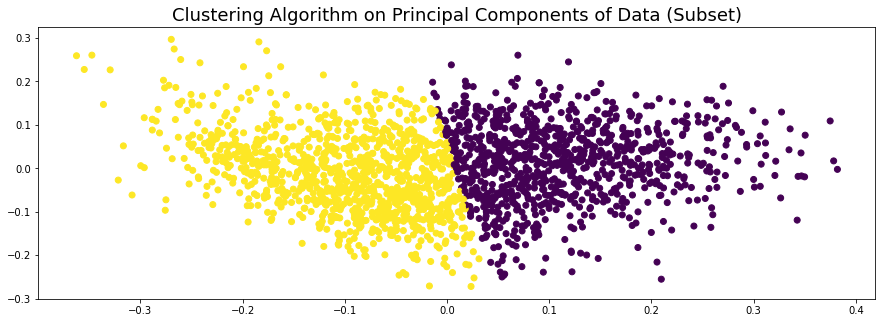

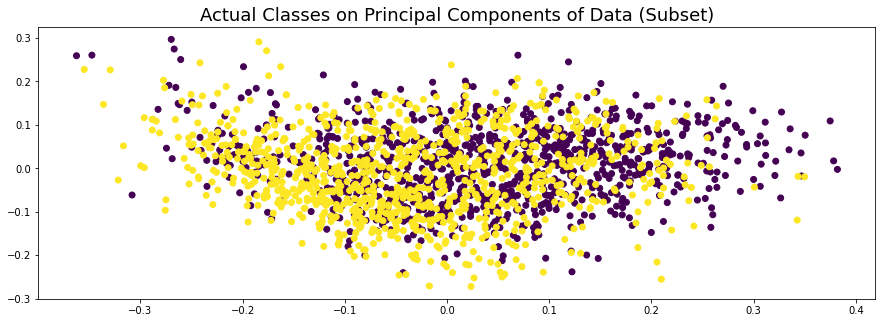

In [ ]:
# visualization
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c = prediction);
plt.title("Clustering Algorithm on Principal Components of Data (Subset)", size = 18)
plt.gcf().set_size_inches(15,5)

plt.figure()
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c = genuine_fake_text_y);
plt.title("Actual Classes on Principal Components of Data (Subset)", size = 18)
plt.gcf().set_size_inches(15,5)

* The K-Means Clustering Algorithm was able to cluster the data into two main clusters. 
* But for the actual classes, it looks like it did a not good job of clustering the data into the two actual classes. There is large overlap with the yellow and purple.
* Thus, even if our clustering algorithm was accurate, our classification algorithms might not be well suited for classifying the data into groups.

In [ ]:
# importing word_tokenize to use in function below
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize sentences
combined_data['sentences'] = combined_data['text'].apply(lambda x: nltk.sent_tokenize(x))
combined_data

usr_id  ...                                          sentences
0          923  ...  [The food at snack is a selection of popular G...
1          924  ...  [This little place in Soho is wonderful., I ha...
2          925  ...  [ordered lunch for 15 from Snack last Friday.,...
3          926  ...  [This is a beautiful quaint little restaurant ...
4          927  ...  [Snack is great place for a  casual sit down l...
...        ...  ...                                                ...
358952   43880  ...  [I may not be a gumbo expert, but I know what ...
358953   43881  ...  [Stopped by The Gumbo Bros stand for lunch thi...
358954   43882  ...  [The Gumbo Bros couldn't have hit NYC at a bet...
358955   43883  ...  [This is the best gumbo I have ever had!, I am...
358956   43884  ...  [I'm from Louisiana, so I've eaten hundreds of...

[358957 rows x 9 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

# Split training and test data
size = 18000
real_text = combined_data[combined_data['review_label'] == 1][['sentences','review_label']]
real_text_train = real_text[:size]
real_text_test = real_text[size:]

fake_text = combined_data[combined_data['review_label'] == -1][['sentences','review_label']]
fake_text_train = fake_text[:size]
fake_text_test = fake_text[size:]

# Clustering X
real_fake_text_X_train = real_text_train['sentences'].append(fake_text_train['sentences'])
real_fake_text_X_test = real_text_test['sentences'].append(fake_text_test['sentences'])

# Clustering y
real_fake_text_y_train_raw = real_text_train['review_label'].append(fake_text_train['review_label'])
real_fake_text_y_train = []
for val in real_fake_text_y_train_raw:
  if val == 1:
    real_fake_text_y_train.append(0)
  else:
    real_fake_text_y_train.append(1)

real_fake_text_y_test_raw = real_text_test['review_label'].append(fake_text_test['review_label'])
real_fake_text_y_test = []
for val in real_fake_text_y_test_raw:
  if val == 1:
    real_fake_text_y_test.append(0)
  else:
    real_fake_text_y_test.append(1)

In [ ]:
# Gensim TF_IDF Vectorization
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.matutils import corpus2csc

real_fake_text_X_train_raw = Dictionary(real_fake_text_X_train)
real_fake_text_X_test_raw = Dictionary(real_fake_text_X_test)

# Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples.
real_fake_train_corpus = [real_fake_text_X_train_raw.doc2bow(line) for line in real_fake_text_X_train]
real_fake_test_corpus = [real_fake_text_X_test_raw.doc2bow(line) for line in real_fake_text_X_test]

real_fake_train_model = TfidfModel(real_fake_train_corpus)
real_fake_test_model = TfidfModel(real_fake_test_corpus)

real_fake_train_vector = real_fake_train_model[real_fake_train_corpus]
real_fake_test_vector = real_fake_test_model[real_fake_test_corpus]

real_fake_X_train = corpus2csc(real_fake_train_vector).T
real_fake_X_test = corpus2csc(real_fake_test_vector).T

In [ ]:
# K-Means Clustering using Principal Components
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

sklearn_pca = TruncatedSVD(n_components = 50)
X_train_sklearn = sklearn_pca.fit_transform(real_fake_X_train)
X_test_sklearn = sklearn_pca.fit_transform(real_fake_X_test)
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
fitted_model = kmeans.fit(X_train_sklearn)
prediction = fitted_model.predict(X_test_sklearn)

# clustering_df = pd.DataFrame(Y_test_sklearn)
# clustering_df.columns = ['x', 'y']
# clustering_df['review_lable'] = real_fake_text_y_test
# clustering_df['prediction'] = prediction

# clustering_df

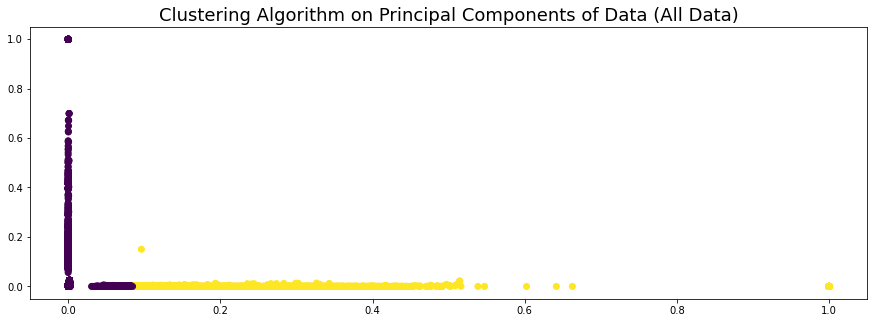

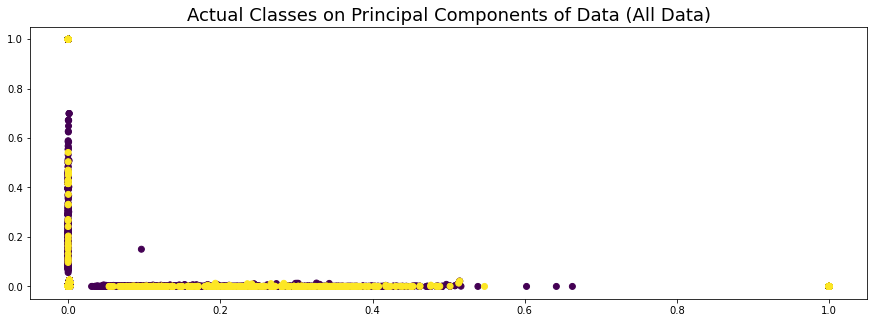

In [ ]:
plt.scatter(X_test_sklearn[:,0],X_test_sklearn[:,1], c = prediction);
plt.title("Clustering Algorithm on Principal Components of Data (All Data)", size = 18)
plt.gcf().set_size_inches(15,5)

plt.figure()
plt.scatter(X_test_sklearn[:,0],X_test_sklearn[:,1], c = real_fake_text_y_test);
plt.title("Actual Classes on Principal Components of Data (All Data)", size = 18)
plt.gcf().set_size_inches(15,5)

plt.show()

F1 score:   7.098
Accuracy score:   0.922


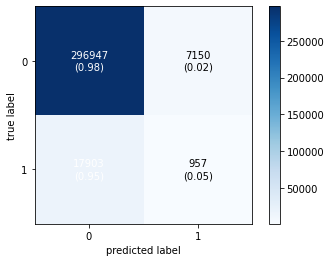

In [ ]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

score = metrics.f1_score(real_fake_text_y_test, prediction)
print("F1 score:   %0.3f" % (score*100))
print("Accuracy score:   %0.3f" % (metrics.accuracy_score(real_fake_text_y_test, prediction)))
cm = metrics.confusion_matrix(real_fake_text_y_test, prediction, labels=[0,1])


# Confusion Matrix 1
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(real_fake_text_y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
# 0 for real review, 1 for fake review

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print(classification_report(real_fake_text_y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    304097
           1       0.12      0.05      0.07     18860

    accuracy                           0.92    322957
   macro avg       0.53      0.51      0.52    322957
weighted avg       0.89      0.92      0.91    322957



## Part 5: Ensemble Learning + Evaluation
1. Contextual Language Models + (Naive Bayes, Support Vector Machine, Passive Aggressive Classifier, Logistic Regression, Xgboost.)
Our approach mainly is based on the idea of ensemble learning.

In [ ]:
!pip install transformers
!pip install xgboost
!pip install -U sentence-transformers

import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
from sklearn.pipeline import Pipeline, FeatureUnion
import os
from torch.autograd import Variable
import torch.nn.functional as F
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel, BertForSequenceClassification, RobertaForSequenceClassification, XLMForSequenceClassification, XLNetForSequenceClassification, T5ForConditionalGeneration, T5Tokenizer
from transformers import BertTokenizer, BertModel
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, Dataset
warnings.filterwarnings('ignore')

     |████████████████████████████████| 2.3MB 7.6MB/s 
     |████████████████████████████████| 901kB 44.4MB/s 
     |████████████████████████████████| 3.3MB 34.7MB/s 
     |████████████████████████████████| 81kB 4.5MB/s 
     |████████████████████████████████| 1.2MB 22.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.1-cp37-none-any.whl size=123338 sha256=290baba9cedefbf9dc4a5e326297859a0bb777a4f80689133610fc4bdb53347e
  Stored in directory: /root/.cache/pip/wheels/5e/89/29/45e45adc162b50f97f71801e8b07947c9cfe2b3ae7dbf37896
Successfully built sentence-transformers


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount= True)
combined_data = pd.read_csv("/content/drive/MyDrive/UCI-ML-Hackaton/processed-data/combined_data.csv")


# 1 for real review, 0 for fake review
combined_data['review_label'] = combined_data['review_label'].map({-1:0, 1:1})
# LebelEncoder - Encode target labels with value between 0 and n_classes-1
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# combined_data['review_label'] = le.fit_transform(combined_data['review_label'])

Mounted at /content/drive


In [ ]:
# Context Model Load - upsampled

# BERT
Bert_base_upsampled = BertForSequenceClassification.from_pretrained("bert-base-uncased").cuda()
Bert_base_upsampled.load_state_dict(torch.load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/Trained_modelBERT_base_uncased_best_model_upsampled.ckpt"))

# Roberta-large
Roberta_large_upsampled = RobertaForSequenceClassification.from_pretrained("roberta-large").cuda()
Roberta_large_upsampled.load_state_dict(torch.load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/ROBERTA_large_best_model_Oversampled.ckpt"))

# XLnet
Xlnet_base_upsampled = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased").cuda()
Xlnet_base_upsampled.load_state_dict(torch.load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/XLNet_base_best_model_upsampled.ckpt"))

# XLM-Roberta
Xlmroberta_base_upsampled = RobertaForSequenceClassification.from_pretrained("xlm-roberta-base").cuda()
Xlmroberta_base_upsampled.load_state_dict(torch.load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/XLMROBERTa_base_best_model_Upsampled.ckpt"))

# T5
T5_upsampled = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/t5-base-512_epoch2_upsample/t5-base-512")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'clas

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'logits_proj.bias', 'sequence_summary.summary.bias', 'logits_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_proj.weight',

In [ ]:
# tfidf model load
def tfidf_model_load(filepath):
  loaded_model = pickle.load(open(filepath, 'rb'))
  return loaded_model

In [ ]:
# define dataset transfer
from sklearn.utils import resample
import pandas as pd
import numpy as np
def dataset_transfer(mode, X_train, X_test, y_train, y_test):
  X = pd.concat([X_train, y_train], axis=1)
  # separate minority and majority classes
  real = X[X['review_label'] == 1]
  fake = X[X['review_label'] == 0]
  
  if mode == "up": 
    # upsample minority
    fake_upsampled = resample(fake,
                              replace=True, # sample with replacement
                              n_samples=len(real), # match number in majority class
                              random_state=1) # reproducible results

    # combine majority and upsampled minority
    upsampled = pd.concat([real, fake_upsampled])
    y_train = upsampled.review_label
    X_train = upsampled.drop('review_label', axis=1)

    return X_train, X_test, y_train, y_test
  
  if mode == "down":
    # downsample majority
    real_downsampled = resample(real,
                              replace=True, # sample with replacement
                              n_samples=len(fake), # match number in minority class
                              random_state=1) # reproducible results

    # combine downsample majority and minority
    downsampled = pd.concat([real_downsampled, fake])
    y_train = downsampled.review_label
    X_train = downsampled.drop('review_label', axis=1)

    return X_train, X_test, y_train, y_test

In [ ]:
# Define a function to add a new feature, fake probability (fake_prob) 
# to the trainning and testing data using Categorical Naive Bayes model.
def add_fake_prob(X_train, X_test, y_train, y_test):
  # Encoding Categories
  # OrdinalEncoder - convert the features to ordinal integers. 
  # This results in a single column of integers (0 to n_categories - 1) per feature.
  from sklearn.preprocessing import OrdinalEncoder
  X = pd.concat([X_train, X_test])
  X.drop('text', axis=1, inplace=True)
  encoder = OrdinalEncoder()
  data_encoded = encoder.fit_transform(X)
  X_encoded = pd.DataFrame(data_encoded, columns=X.columns)
  # LebelEncoder - Encode target labels with value between 0 and n_classes-1
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  y_train_encoded = le.fit_transform(y_train)
  # Split the encoded dataset into training and testing data
  X_train_encoded = X_encoded[:len(X_train)]
  X_test_encoded = X_encoded[len(X_train):]
  # Use Categorical Naive Bayes model to calculate the fake probability
  from sklearn.naive_bayes import CategoricalNB
  clf = CategoricalNB()
  clf.fit(X_train_encoded, y_train_encoded)
  # probs for all categories in training data
  X_train_probs = clf.predict_proba(X_train_encoded)
  # probs for all categories in testing data
  X_test_probs = clf.predict_proba(X_test_encoded)
  # fake_prob for training data
  X_train['fake_prob'] = X_train_probs[:,0]
  # fake_prob for testing data
  X_test['fake_prob']=X_test_probs[:,0]
  # return X_train, X_test, y_train, y_test 

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
# text and numeric classes that use sklearn base libaries
class TextTransformer(BaseEstimator, TransformerMixin):
    """
    Transform text features
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None, *parg, **kwarg):
        return self

    def transform(self, X):
        return X[self.key]

class NumberTransformer(BaseEstimator, TransformerMixin):
    """
    Transform numeric features
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
# Data preprocessing
# splitting data for training and testing
import sklearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
x_features = ['usr_id', 'prod_id', 'prod_rating', 'rating_date', 'text']
y = 'review_label'
X_train,X_test,y_train,y_test = train_test_split(combined_data[x_features],
                                                 combined_data[y],
                                                 test_size=0.2, random_state = 1)
# upSampling the training data
X_train,X_test,y_train,y_test = dataset_transfer("up", X_train, X_test, y_train, y_test)
# Add fake_prob to the training and testing data using Categorical Naive Bayes model
add_fake_prob(X_train,X_test,y_train,y_test)

In [ ]:
MAX_LEN = 128

def Encode_TextWithAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=True):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids'],encoded_dict['attention_mask']

def Encode_TextWithoutAttention(sentence,tokenizer,maxlen,padding_type='max_length',attention_mask_flag=False):
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, truncation=True, padding=padding_type, return_attention_mask=attention_mask_flag)
    return encoded_dict['input_ids']

def get_TokenizedTextWithAttentionMask(sentenceList, tokenizer):
    token_ids_list,attention_mask_list = [],[]
    for sentence in sentenceList:
        token_ids,attention_mask = Encode_TextWithAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
        attention_mask_list.append(attention_mask)
    return token_ids_list,attention_mask_list

def get_TokenizedText(sentenceList, tokenizer):
    token_ids_list = []
    for sentence in sentenceList:
        token_ids = Encode_TextWithoutAttention(sentence,tokenizer,MAX_LEN)
        token_ids_list.append(token_ids)
    return token_ids_list

In [ ]:
import numpy as np
import pandas as pd
import sentencepiece

class ReviewsData(Dataset):
    def __init__(self, df, tokenizer, type_path, num_samples, input_length=4096, output_length=4096, print_text=False):         
        ## Shuffle data set
        df = df.sample(frac=1, random_state=1)
        self.dataset = []
        val_size = int(1.0 * df.shape[0])

        inps = df["text"].values.tolist()
        lbls = df["review_label"].values.tolist()

        for i, inp in enumerate(inps):
            inp = inp.replace(":", "")
            inp = "classify: " + inp
            lbl = str(lbls[i])
            self.dataset.append({"inp": inp, "lbl": lbl})
        
        if type_path == "train":
            self.dataset = self.dataset[:len(self.dataset) - val_size]
        elif type_path == "validation":
            self.dataset = self.dataset[len(self.dataset) - val_size:]

        if num_samples:
            self.dataset = self.dataset[:num_samples]
        
        # print(len(self.dataset))

        self.input_length = input_length
        self.tokenizer = tokenizer
        self.output_length = output_length
        self.print_text = print_text
        
  
    def __len__(self):
        return len(self.dataset)

    def convert_to_features(self, example_batch):
        
        input_ = example_batch['inp']
        target_ = example_batch['lbl']
        
        input_ = input_.strip()

        
        source = self.tokenizer.batch_encode_plus([input_], max_length=self.input_length, 
                                                     padding='max_length', truncation=True, return_tensors="pt")
        
        targets = self.tokenizer.batch_encode_plus([target_], max_length=3, 
                                                     padding='max_length', truncation=True, return_tensors="pt")

        return source, targets
  
    def __getitem__(self, index):
        source, targets = self.convert_to_features(self.dataset[index])
        
        
        if self.print_text:
            print("Lens are: ", source['input_ids'][0].shape, targets['input_ids'][0].shape)
        
        source_ids = source["input_ids"].squeeze()
        target_ids = targets["input_ids"].squeeze()

        # return {"source_ids": source_ids, "target_ids": target_ids}

        src_mask    = source["attention_mask"].squeeze()
        target_mask = targets["attention_mask"].squeeze()

        return {"source_ids": source_ids, "source_mask": src_mask, "target_ids": target_ids, "target_mask": target_mask}

In [ ]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test):
  # split test data first
  all_test = pd.concat([X_test, y_test], axis=1)
  # test_for_tfidf = all_test[all_test["fake_prob"] != 0.5]
  # test_for_context = all_test[all_test["fake_prob"] == 0.5]
  test_for_tfidf = all_test[(all_test["fake_prob"] < 0.5) | (all_test["fake_prob"] >= 0.9)]
  test_for_context = all_test[(all_test["fake_prob"] >= 0.5) & (all_test["fake_prob"] < 0.9)]

  # tfidf_pred
  tfidf_y_test = [i for i in test_for_tfidf.review_label]
  tfidf_X_test = test_for_tfidf[["text", "fake_prob"]]

  cur_tf_pred = tfidf_model.predict(tfidf_X_test)
  tfidf_pred = [i for i in cur_tf_pred]

  # context_pred
  if context_model_name == "t5-base":
    tokenizer = T5Tokenizer.from_pretrained(context_model_name)
    d = {"text": test_for_context.text, "review_label": test_for_context.review_label}
    cur_df = pd.DataFrame(d)
    dataset = dataset = ReviewsData(cur_df, tokenizer, 'validation', None, 128, 3, True)
    
    #Evaluation step @Junchen
    loader = DataLoader(dataset, batch_size=32, shuffle=True)
    context_pred = []
    context_label = []
    for batch in loader:
      context_model.to('cuda')
      outs = context_model.generate(
                  batch["source_ids"].cuda(),
                  attention_mask=batch["source_mask"].cuda(),
                  use_cache=True,
                  decoder_attention_mask=batch['target_mask'].cuda(),
              )

      prediction = [int(i) for i in [tokenizer.batch_decode(ids, skip_special_tokens= True)[1] if tokenizer.batch_decode(ids, skip_special_tokens= True)[1] != "" else tokenizer.batch_decode(ids, skip_special_tokens= True)[2]for ids in outs]]
      targets = [int(i) for i in [tokenizer.batch_decode(ids, skip_special_tokens= True)[0] if tokenizer.batch_decode(ids, skip_special_tokens= True)[0] != "" else tokenizer.batch_decode(ids, skip_special_tokens= True)[1] for ids in batch['target_ids']] ]
      # texts = [tokenizer.decode(ids) for ids in batch['source_ids']]
      context_pred.extend([i if i == 1 else 0 for i in prediction])
      context_label.extend([i if i == 1 else 0 for i in targets])
  else:
    tokenizer = AutoTokenizer.from_pretrained(context_model_name, do_lower_case=True)
    context_y_test = test_for_context.review_label
    context_X_test = test_for_context.text
    val_token_ids,val_attention_masks = torch.tensor(get_TokenizedTextWithAttentionMask([i for i in context_X_test],tokenizer))
    val_labels = torch.tensor(context_y_test.values)
    batch_size = len(context_X_test)
    validation_data = TensorDataset(val_token_ids, val_attention_masks, val_labels)
    validation_sampler = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=32)
    context_pred = []
    context_label = []
    for batch in validation_dataloader:
          batch = tuple(t.to(device) for t in batch)
          b_input_ids, b_input_mask, b_labels = batch
          with torch.no_grad():
            output = context_model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            logits = output[0]

          logits = logits.detach().cpu().numpy()
          label_ids = b_labels.to('cpu').numpy()
          labels_flat = label_ids.flatten()
          prediction = np.argmax(logits, axis=1).flatten()
          for i in range(len(prediction)):
            context_pred.append(prediction[i])
            context_label.append(labels_flat[i])

  # all result concatenate
  final_label = []
  final_label.extend(tfidf_y_test)
  final_label.extend(context_label)

  final_pred = []
  final_pred.extend(tfidf_pred)
  final_pred.extend(context_pred)

  # ensemble eval
  print("----------------------------------------")
  print("-----Ensemble Evaluation on {} + {}-----".format(tfidf_model_name, context_model_name))
  print("----------------------------------------")
  score = metrics.f1_score(final_label, final_pred)
  print("Accuracy score:   %0.6f" % (metrics.accuracy_score(final_label, final_pred)))
  print("F1 score:   %0.6f" % (score*100))
  print("Recall score:   %0.6f" % (recall_score(final_label, final_pred)))
  print("Precison score:   %0.6f" % (precision_score(final_label, final_pred)))
  cm = metrics.confusion_matrix(final_label, final_pred, labels=[0,1])


  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(final_label, final_pred),
                                  show_absolute=True,
                                  show_normed=True,
                                  colorbar=True)
  plt.show()
  print(classification_report(final_label, final_pred))
  print(roc_auc_score(final_pred, final_label))

### Part 5.1: Cross Ensemble Learning - Naive Bayes

----------------------------------------
-----Ensemble Evaluation on Naive Bayes Classifier + bert-base-uncased-----
----------------------------------------
Accuracy score:   0.833157
F1 score:   90.569098
Recall score:   0.894869
Precison score:   0.916778


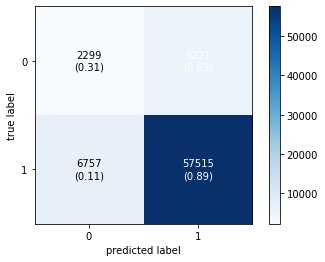

              precision    recall  f1-score   support

           0       0.25      0.31      0.28      7520
           1       0.92      0.89      0.91     64272

    accuracy                           0.83     71792
   macro avg       0.59      0.60      0.59     71792
weighted avg       0.85      0.83      0.84     71792



In [ ]:
tfidf_model_name = "Naive Bayes Classifier"
tfidf_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/bayes_model_fakeProb.sav")
context_model_name = "bert-base-uncased"
context_model = Bert_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)


----------------------------------------
-----Ensemble Evaluation on Naive Bayes Classifier + roberta-large-----
----------------------------------------
Accuracy score:   0.833073
F1 score:   90.564820
Recall score:   0.894869
Precison score:   0.916691


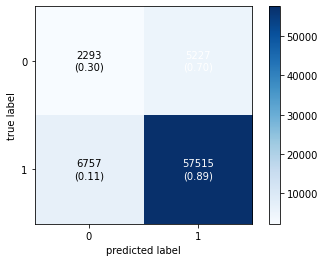

              precision    recall  f1-score   support

           0       0.25      0.30      0.28      7520
           1       0.92      0.89      0.91     64272

    accuracy                           0.83     71792
   macro avg       0.59      0.60      0.59     71792
weighted avg       0.85      0.83      0.84     71792



In [ ]:
context_model_name = "roberta-large"
context_model = Roberta_large_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Naive Bayes Classifier + xlnet-base-cased-----
----------------------------------------
Accuracy score:   0.827126
F1 score:   90.041484
Recall score:   0.872977
Precison score:   0.929633


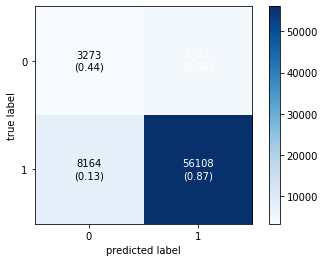

              precision    recall  f1-score   support

           0       0.29      0.44      0.35      7520
           1       0.93      0.87      0.90     64272

    accuracy                           0.83     71792
   macro avg       0.61      0.65      0.62     71792
weighted avg       0.86      0.83      0.84     71792



In [ ]:
context_model_name = "xlnet-base-cased"
context_model = Xlnet_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)


----------------------------------------
-----Ensemble Evaluation on Naive Bayes Classifier + xlm-roberta-base-----
----------------------------------------
Accuracy score:   0.803056
F1 score:   88.275244
Recall score:   0.828137
Precison score:   0.945081


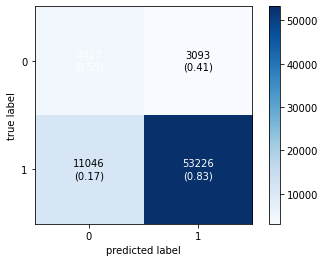

              precision    recall  f1-score   support

           0       0.29      0.59      0.39      7520
           1       0.95      0.83      0.88     64272

    accuracy                           0.80     71792
   macro avg       0.62      0.71      0.63     71792
weighted avg       0.88      0.80      0.83     71792



In [ ]:
context_model_name = "xlm-roberta-base"
context_model = Xlmroberta_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

Streaming output truncated to the last 5000 lines.
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens

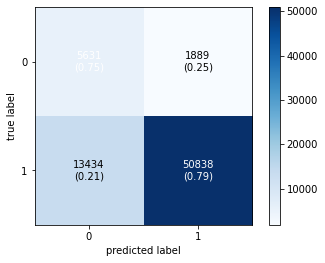

              precision    recall  f1-score   support

           0       0.30      0.75      0.42      7520
           1       0.96      0.79      0.87     64272

    accuracy                           0.79     71792
   macro avg       0.63      0.77      0.65     71792
weighted avg       0.89      0.79      0.82     71792



In [ ]:
context_model_name = "t5-base"
context_model = T5_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

### Part 5.2: Cross Ensemble Learning - Support Vector Machine

----------------------------------------
-----Ensemble Evaluation on Support Vector Machine + bert-base-uncased-----
----------------------------------------
Accuracy score:   0.918375
F1 score:   95.634164
Recall score:   0.998600
Precison score:   0.917515


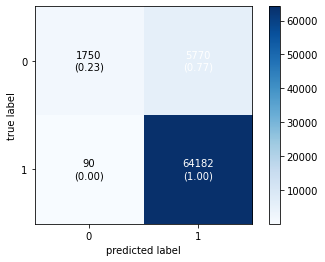

              precision    recall  f1-score   support

           0       0.95      0.23      0.37      7520
           1       0.92      1.00      0.96     64272

    accuracy                           0.92     71792
   macro avg       0.93      0.62      0.67     71792
weighted avg       0.92      0.92      0.90     71792



In [ ]:
tfidf_model_name = "Support Vector Machine"
tfidf_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/svm_model_fakeProb.sav")
context_model_name = "bert-base-uncased"
context_model = Bert_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Support Vector Machine + roberta-large-----
----------------------------------------
Accuracy score:   0.918292
F1 score:   95.629889
Recall score:   0.998600
Precison score:   0.917436


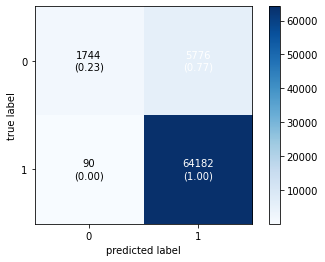

              precision    recall  f1-score   support

           0       0.95      0.23      0.37      7520
           1       0.92      1.00      0.96     64272

    accuracy                           0.92     71792
   macro avg       0.93      0.62      0.66     71792
weighted avg       0.92      0.92      0.90     71792



In [ ]:
context_model_name = "roberta-large"
context_model = Roberta_large_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Support Vector Machine + xlnet-base-cased-----
----------------------------------------
Accuracy score:   0.912344
F1 score:   95.226899
Recall score:   0.976708
Precison score:   0.929023


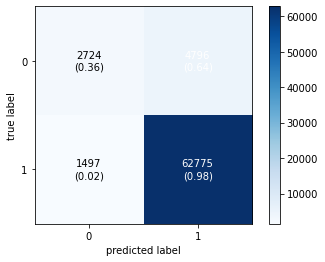

              precision    recall  f1-score   support

           0       0.65      0.36      0.46      7520
           1       0.93      0.98      0.95     64272

    accuracy                           0.91     71792
   macro avg       0.79      0.67      0.71     71792
weighted avg       0.90      0.91      0.90     71792



In [ ]:
context_model_name = "xlnet-base-cased"
context_model = Xlnet_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Support Vector Machine + xlm-roberta-base-----
----------------------------------------
Accuracy score:   0.888274
F1 score:   93.724131
Recall score:   0.931868
Precison score:   0.942677


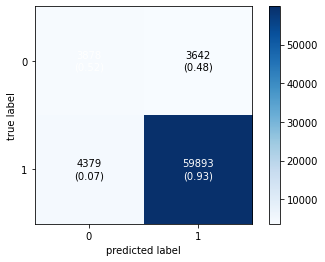

              precision    recall  f1-score   support

           0       0.47      0.52      0.49      7520
           1       0.94      0.93      0.94     64272

    accuracy                           0.89     71792
   macro avg       0.71      0.72      0.71     71792
weighted avg       0.89      0.89      0.89     71792



In [ ]:
context_model_name = "xlm-roberta-base"
context_model = Xlmroberta_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

Streaming output truncated to the last 5000 lines.
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens

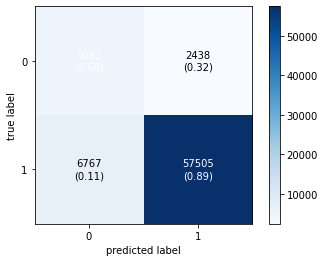

              precision    recall  f1-score   support

           0       0.43      0.68      0.52      7520
           1       0.96      0.89      0.93     64272

    accuracy                           0.87     71792
   macro avg       0.69      0.79      0.73     71792
weighted avg       0.90      0.87      0.88     71792



In [ ]:
context_model_name = "t5-base"
context_model = T5_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

### Part 5.3: Cross Ensemble Learning - Passive Aggressive Classifier

----------------------------------------
-----Ensemble Evaluation on Passive Aggressive Classifier + bert-base-uncased-----
----------------------------------------
Accuracy score:   0.918334
F1 score:   95.631701
Recall score:   0.998522
Precison score:   0.917535


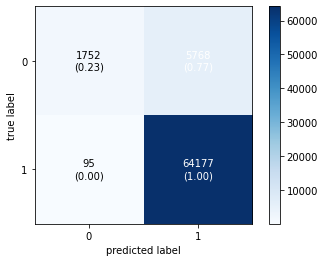

              precision    recall  f1-score   support

           0       0.95      0.23      0.37      7520
           1       0.92      1.00      0.96     64272

    accuracy                           0.92     71792
   macro avg       0.93      0.62      0.67     71792
weighted avg       0.92      0.92      0.90     71792



In [ ]:
tfidf_model_name = "Passive Aggressive Classifier"
tfidf_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/pac_model_fakeProb.sav")
context_model_name = "bert-base-uncased"
context_model = Bert_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Passive Aggressive Classifier + roberta-large-----
----------------------------------------
Accuracy score:   0.918250
F1 score:   95.627426
Recall score:   0.998522
Precison score:   0.917457


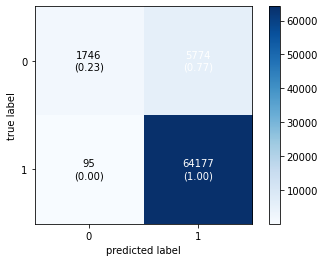

              precision    recall  f1-score   support

           0       0.95      0.23      0.37      7520
           1       0.92      1.00      0.96     64272

    accuracy                           0.92     71792
   macro avg       0.93      0.62      0.66     71792
weighted avg       0.92      0.92      0.90     71792



In [ ]:
context_model_name = "roberta-large"
context_model = Roberta_large_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Passive Aggressive Classifier + xlnet-base-cased-----
----------------------------------------
Accuracy score:   0.912302
F1 score:   95.224370
Recall score:   0.976631
Precison score:   0.929045


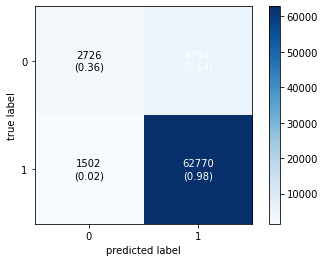

              precision    recall  f1-score   support

           0       0.64      0.36      0.46      7520
           1       0.93      0.98      0.95     64272

    accuracy                           0.91     71792
   macro avg       0.79      0.67      0.71     71792
weighted avg       0.90      0.91      0.90     71792



In [ ]:
context_model_name = "xlnet-base-cased"
context_model = Xlnet_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Passive Aggressive Classifier + xlm-roberta-base-----
----------------------------------------
Accuracy score:   0.888233
F1 score:   93.721440
Recall score:   0.931790
Precison score:   0.942702


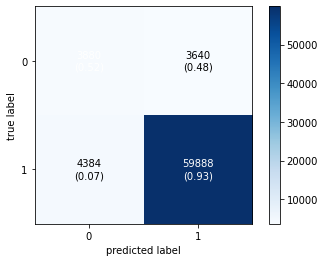

              precision    recall  f1-score   support

           0       0.47      0.52      0.49      7520
           1       0.94      0.93      0.94     64272

    accuracy                           0.89     71792
   macro avg       0.71      0.72      0.71     71792
weighted avg       0.89      0.89      0.89     71792



In [ ]:
context_model_name = "xlm-roberta-base"
context_model = Xlmroberta_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

Streaming output truncated to the last 5000 lines.
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens

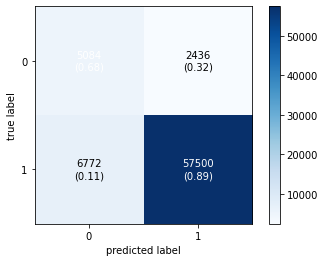

              precision    recall  f1-score   support

           0       0.43      0.68      0.52      7520
           1       0.96      0.89      0.93     64272

    accuracy                           0.87     71792
   macro avg       0.69      0.79      0.73     71792
weighted avg       0.90      0.87      0.88     71792



In [ ]:
context_model_name = "t5-base"
context_model = T5_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

### Part 5.4: Cross Ensemble Learning - Logistic Regression

----------------------------------------
-----Ensemble Evaluation on Logistic Regression + bert-base-uncased-----
----------------------------------------
Accuracy score:   0.918375
F1 score:   95.634229
Recall score:   0.998615
Precison score:   0.917503


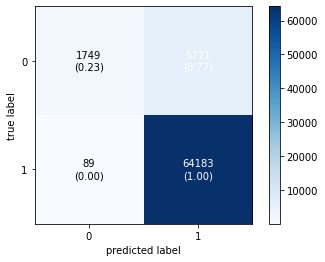

              precision    recall  f1-score   support

           0       0.95      0.23      0.37      7520
           1       0.92      1.00      0.96     64272

    accuracy                           0.92     71792
   macro avg       0.93      0.62      0.67     71792
weighted avg       0.92      0.92      0.90     71792



In [ ]:
tfidf_model_name = "Logistic Regression"
tfidf_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/logistic_model_fakeProb.sav")
context_model_name = "bert-base-uncased"
context_model = Bert_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Logistic Regression + roberta-large-----
----------------------------------------
Accuracy score:   0.918292
F1 score:   95.629954
Recall score:   0.998615
Precison score:   0.917424


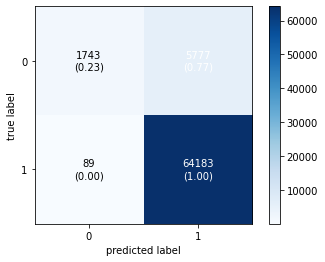

              precision    recall  f1-score   support

           0       0.95      0.23      0.37      7520
           1       0.92      1.00      0.96     64272

    accuracy                           0.92     71792
   macro avg       0.93      0.62      0.66     71792
weighted avg       0.92      0.92      0.90     71792



In [ ]:
context_model_name = "roberta-large"
context_model = Roberta_large_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Logistic Regression + xlnet-base-cased-----
----------------------------------------
Accuracy score:   0.912344
F1 score:   95.226971
Recall score:   0.976724
Precison score:   0.929010


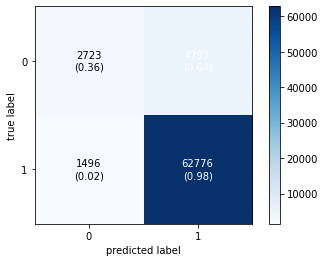

              precision    recall  f1-score   support

           0       0.65      0.36      0.46      7520
           1       0.93      0.98      0.95     64272

    accuracy                           0.91     71792
   macro avg       0.79      0.67      0.71     71792
weighted avg       0.90      0.91      0.90     71792



In [ ]:
context_model_name = "xlnet-base-cased"
context_model = Xlnet_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Logistic Regression + xlm-roberta-base-----
----------------------------------------
Accuracy score:   0.888274
F1 score:   93.724229
Recall score:   0.931883
Precison score:   0.942663


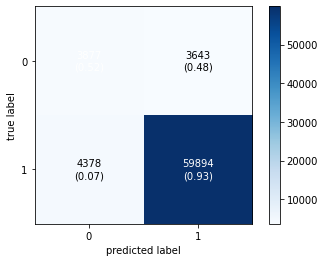

              precision    recall  f1-score   support

           0       0.47      0.52      0.49      7520
           1       0.94      0.93      0.94     64272

    accuracy                           0.89     71792
   macro avg       0.71      0.72      0.71     71792
weighted avg       0.89      0.89      0.89     71792



In [ ]:
context_model_name = "xlm-roberta-base"
context_model = Xlmroberta_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

Streaming output truncated to the last 5000 lines.
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens

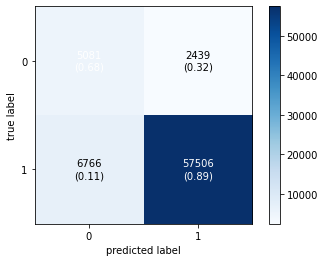

              precision    recall  f1-score   support

           0       0.43      0.68      0.52      7520
           1       0.96      0.89      0.93     64272

    accuracy                           0.87     71792
   macro avg       0.69      0.79      0.73     71792
weighted avg       0.90      0.87      0.88     71792



In [ ]:
context_model_name = "t5-base"
context_model = T5_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

### Part 5.5: Cross Ensemble Learning - Xgboost

----------------------------------------
-----Ensemble Evaluation on Xgboost Classifier + bert-base-uncased-----
----------------------------------------
Accuracy score:   0.918375
F1 score:   95.634229
Recall score:   0.998615
Precison score:   0.917503


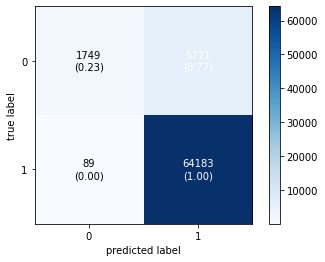

              precision    recall  f1-score   support

           0       0.95      0.23      0.37      7520
           1       0.92      1.00      0.96     64272

    accuracy                           0.92     71792
   macro avg       0.93      0.62      0.67     71792
weighted avg       0.92      0.92      0.90     71792



In [ ]:
tfidf_model_name = "Xgboost Classifier"
tfidf_model = tfidf_model_load("/content/drive/MyDrive/UCI-ML-Hackaton/Trained_model/xgboost_model_fakeProb.sav")
context_model_name = "bert-base-uncased"
context_model = Bert_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Xgboost Classifier + roberta-large-----
----------------------------------------
Accuracy score:   0.918292
F1 score:   95.629954
Recall score:   0.998615
Precison score:   0.917424


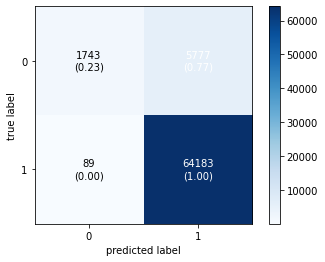

              precision    recall  f1-score   support

           0       0.95      0.23      0.37      7520
           1       0.92      1.00      0.96     64272

    accuracy                           0.92     71792
   macro avg       0.93      0.62      0.66     71792
weighted avg       0.92      0.92      0.90     71792



In [ ]:
context_model_name = "roberta-large"
context_model = Roberta_large_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Xgboost Classifier + xlnet-base-cased-----
----------------------------------------
Accuracy score:   0.912344
F1 score:   95.226971
Recall score:   0.976724
Precison score:   0.929010


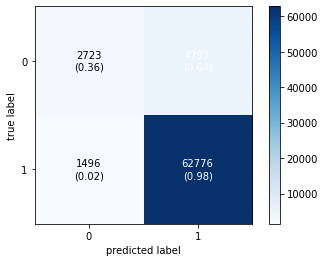

              precision    recall  f1-score   support

           0       0.65      0.36      0.46      7520
           1       0.93      0.98      0.95     64272

    accuracy                           0.91     71792
   macro avg       0.79      0.67      0.71     71792
weighted avg       0.90      0.91      0.90     71792



In [ ]:
context_model_name = "xlnet-base-cased"
context_model = Xlnet_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

----------------------------------------
-----Ensemble Evaluation on Xgboost Classifier + xlm-roberta-base-----
----------------------------------------
Accuracy score:   0.888274
F1 score:   93.724229
Recall score:   0.931883
Precison score:   0.942663


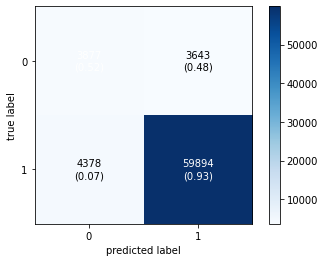

              precision    recall  f1-score   support

           0       0.47      0.52      0.49      7520
           1       0.94      0.93      0.94     64272

    accuracy                           0.89     71792
   macro avg       0.71      0.72      0.71     71792
weighted avg       0.89      0.89      0.89     71792



In [ ]:
context_model_name = "xlm-roberta-base"
context_model = Xlmroberta_base_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)

Streaming output truncated to the last 5000 lines.
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens are:  torch.Size([128]) torch.Size([3])
Lens

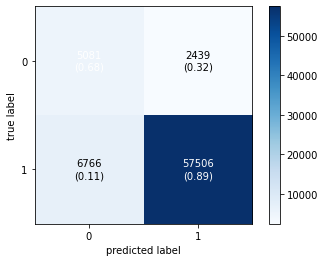

              precision    recall  f1-score   support

           0       0.43      0.68      0.52      7520
           1       0.96      0.89      0.93     64272

    accuracy                           0.87     71792
   macro avg       0.69      0.79      0.73     71792
weighted avg       0.90      0.87      0.88     71792



In [ ]:
context_model_name = "t5-base"
context_model = T5_upsampled
ensemble_estimator(tfidf_model, tfidf_model_name, context_model, context_model_name, X_test, y_test)